<a href="https://colab.research.google.com/github/NinjaBlac/business-analytics-assignments/blob/main/Group_Regression_Project_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling

The Cape Town, South Africa AirBnB listings is quite a small dataset, if we sampled it will create biases therefore using the full dataset will provide a comprehensive view of the data, allowing more precise and accurate modeling. This will lead to reliable insights and predictions for business decisions.

# Importing Dataset

In [ ]:
import pandas as pd
import numpy as np # numpy is a scientific computation tool, helps us with math calculation
import matplotlib.pyplot as plt # building plots
import seaborn as sns

In [ ]:
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Print out the uploaded file name
for filename in uploaded.keys():
    print('File uploaded:', filename)


Saving listings (3).csv to listings (3).csv
File uploaded: listings (3).csv


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('listings (3).csv')

# Display the first few rows of the DataFrame
print(df.head())

      id                                               name  host_id  \
0   3191  Home in Southern Suburbs · ★4.81 · 1 bedroom ·...     3754   
1  15007  Home in Cape Town · ★4.82 · 3 bedrooms · 4 bed...    59072   
2  15068  Rental unit in Cape Town · 3 bedrooms · 5 beds...    59318   
3  15077  Rental unit in Tableview - Sunset Beach · ★5.0...    59342   
4  15199  Rental unit in Cape Town · 1 bedroom · 1 bed ·...    59694   

  host_name  neighbourhood_group neighbourhood   latitude  longitude  \
0  Brigitte                  NaN       Ward 57 -33.947620  18.475990   
1      Dirk                  NaN       Ward 23 -33.800010  18.460630   
2     Linda                  NaN       Ward 23 -33.788260  18.459400   
3     Georg                  NaN        Ward 4 -33.858356  18.490376   
4     Alexa                  NaN      Ward 115 -33.911150  18.412350   

         room_type   price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt   650.0               3               

In [ ]:
import pandas as pd


# Adjusting the code to account for variations like "private bath" or "shared bath"

def extract_details_adjusted(df):
    # Extract rating if available
    df['rating'] = df['name'].str.extract(r'★(\d+\.\d+)')

    # Extract bedrooms
    df['bedrooms'] = df['name'].str.extract(r'(\d+)\s+bedroom')

    # Extract bathrooms, accounting for "private" or "shared" descriptors
    df['bathrooms'] = df['name'].str.extract(r'(\d+)\s+(?:private\s+|shared\s+)?bath')

    return df [['rating', 'bedrooms', 'bathrooms']]

# Update the function call to include the adjustments
# Assuming 'df' is your original DataFrame
df = extract_details_adjusted(df)

# Now we can check the first 10 rows to confirm the extraction
df.head(10)

df = pd.read_csv('listings (3).csv')
print("Original DataFrame head:")
print(df.head())  # This will print the head of the original DataFrame

# Now, call the extract_details function to modify df in place and add new columns
extract_details_adjusted(df)  # This modifies df to include the new columns

print("\nDataFrame head after extracting details:")
print(df.head(10))  # This will print the head of the DataFrame including the new columns

Original DataFrame head:
      id                                               name  host_id  \
0   3191  Home in Southern Suburbs · ★4.81 · 1 bedroom ·...     3754   
1  15007  Home in Cape Town · ★4.82 · 3 bedrooms · 4 bed...    59072   
2  15068  Rental unit in Cape Town · 3 bedrooms · 5 beds...    59318   
3  15077  Rental unit in Tableview - Sunset Beach · ★5.0...    59342   
4  15199  Rental unit in Cape Town · 1 bedroom · 1 bed ·...    59694   

  host_name  neighbourhood_group neighbourhood   latitude  longitude  \
0  Brigitte                  NaN       Ward 57 -33.947620  18.475990   
1      Dirk                  NaN       Ward 23 -33.800010  18.460630   
2     Linda                  NaN       Ward 23 -33.788260  18.459400   
3     Georg                  NaN        Ward 4 -33.858356  18.490376   
4     Alexa                  NaN      Ward 115 -33.911150  18.412350   

         room_type   price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt   650.0      

This code extracts the variables in the name column such as  bedrooms, bathrooms and ratings which help create other columns within the dataset with numerical data, without changing the contents on the listings csv file.

In [ ]:
feature_names = df.columns

# Convert the feature names to a list if needed
feature_names_list = list(feature_names)

# Print the feature names
print("Feature names:")
print(feature_names_list)

Feature names:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license', 'rating', 'bedrooms', 'bathrooms']


In [ ]:
target_names = df['price'].unique()

# Print the unique target names
print(target_names)

[ 650. 4029. 2000. ... 3598. 2087.  805.]


In [ ]:
df.head(50)

id                                               name  host_id  \
0     3191  Home in Southern Suburbs · ★4.81 · 1 bedroom ·...     3754   
1    15007  Home in Cape Town · ★4.82 · 3 bedrooms · 4 bed...    59072   
2    15068  Rental unit in Cape Town · 3 bedrooms · 5 beds...    59318   
3    15077  Rental unit in Tableview - Sunset Beach · ★5.0...    59342   
4    15199  Rental unit in Cape Town · 1 bedroom · 1 bed ·...    59694   
5    15285  Guesthouse in Southern Suburbs · ★5.0 · 2 bedr...    59964   
6    15354  Guest suite in Durbanville · 2 bedrooms · 2 be...    60196   
7    15480  Rental unit in Cape Town · ★4.36 · 1 bedroom ·...    60443   
8    15704  Villa in Cape Town · 6 bedrooms · 6 beds · 6.5...    61441   
9    16259  Guesthouse in Southern Suburbs · ★5.0 · 1 bedr...    63255   
10   18499       Home in Parow · 1 bedroom · 4 beds · 2 baths    71221   
11   19271  Guest suite in Cape Town · ★4.95 · 1 bedroom ·...    73439   
12   19384  Rental unit in Cape Town · ★5.0 · 2 bedrooms ·...    73764   
13   19561  Rental unit in Durbanville · 1 bedroom · 3 bed...    74188   
14   19658     Home in Milnerton · 1 bedroom · 1 bed · 1 bath    74504   
15  743795  Townhouse in Cape Town · 1 bedroom · 1 bed · 1...  3897359   
16   20125  Rental unit in Cape Town · 1 bedroom · 1 bed ·...    76161   
17  751785  Rental unit in Cape Town · ★4.0 · 1 bedroom · ...  2516345   
18   20263  Villa in Fish Hoek · 3 bedrooms · 3 beds · 3 b...   837661   
19  754780  Rental unit in Cape Town · 1 bedroom · 1 bed ·...  3971841   
20   20403  Home in Somerset West · 4 bedrooms · 8 beds · ...    76971   
21   20670   Home in Muizenberg · 1 bedroom · 1 bed · 2 baths    78185   
22  759767  Home in Cape Town · ★4.76 · 2 bedrooms · 2 bed...  4004504   
23  768582  Rental unit in Cape Town · ★4.80 · 1 bedroom ·...  4054512   
24   22994  Home in Cape Town · ★5.0 · 3 bedrooms · 4 beds...    89107   
25  771176  Rental unit in Cape Town · ★4.90 · 1 bedroom ·...  4065747   
26   28702  Serviced apartment in Southern Suburbs · 2 bed...    59964   
27   28707  Rental unit in Southern Suburbs · ★5.0 · 1 bed...    59964   
28   36347  Loft in Cape Town · ★4.78 · Studio · 2 beds · ...   156196   
29  776601  Home in Cape Town · ★4.67 · 4 bedrooms · 4 bed...  4094560   
30   36483  Home in Blouberg · ★4.76 · 1 bedroom · 3 beds ...   156910   
31   36485  Guest suite in Blouberg · ★4.90 · 1 bedroom · ...   156910   
32   36499  Rental unit in Blouberg · ★4.68 · 1 bedroom · ...   156910   
33   82212  Rental unit in Cape Town · ★4.53 · 2 bedrooms ...   404176   
34  778089  Home in Cape Town · ★4.87 · 4 bedrooms · 4 bed...  2130446   
35   96036  Home in Cape Town · ★4.91 · 2 bedrooms · 2 bed...   510489   
36  782166  Guest suite in Green Point · ★4.79 · 1 bedroom...  2604213   
37  782208  Home in Green Point · ★4.89 · 4 bedrooms · 5 b...  2604213   
38  790177   Home in Cape Town · 2 bedrooms · 2 beds · 1 bath  4171143   
39  101292  Guest suite in Cape Town · ★4.86 · 2 bedrooms ...   531026   
40  103507  Home in Cape Town · ★4.69 · 1 bedroom · 1 bed ...   539579   
41  795400  Home in Cape Town · ★4.33 · 2 bedrooms · 2 bed...  4190050   
42  795614  Home in Cape Town · ★4.73 · 4 bedrooms · 5 bed...  4173981   
43  106673  Rental unit in Cape Town · ★4.85 · 2 bedrooms ...   552892   
44  800546  Rental unit in Cape Town · ★4.90 · 4 bedrooms ...  4214801   
45  800623  Rental unit in Cape Town · ★4.92 · 2 bedrooms ...  4214801   
46  114218  Home in Cape Town · ★4.96 · 4 bedrooms · 4 bed...   579839   
47  801953  Rental unit in Cape Town · ★4.81 · 1 bedroom ·...  4218169   
48  122455  Home in Cape Town · ★5.0 · 4 bedrooms · 5 beds...   613674   
49  801981  Home in Cape Town · ★4.95 · 3 bedrooms · 5 bed...  4221634   

       host_name  neighbourhood_group neighbourhood   latitude  longitude  \
0       Brigitte                  NaN       Ward 57 -33.947620  18.475990   
1           Dirk                  NaN       Ward 23 -33.800010  18.460630   
2 

In [ ]:
df['name'].head(10)

0    Home in Southern Suburbs · ★4.81 · 1 bedroom ·...
1    Home in Cape Town · ★4.82 · 3 bedrooms · 4 bed...
2    Rental unit in Cape Town · 3 bedrooms · 5 beds...
3    Rental unit in Tableview - Sunset Beach · ★5.0...
4    Rental unit in Cape Town · 1 bedroom · 1 bed ·...
5    Guesthouse in Southern Suburbs · ★5.0 · 2 bedr...
6    Guest suite in Durbanville · 2 bedrooms · 2 be...
7    Rental unit in Cape Town · ★4.36 · 1 bedroom ·...
8    Villa in Cape Town · 6 bedrooms · 6 beds · 6.5...
9    Guesthouse in Southern Suburbs · ★5.0 · 1 bedr...
Name: name, dtype: object

# Dataframe Exploration

## Dimension/Shape

In [ ]:
df.shape

(22966, 21)

In the Cape Town AirBnB dataset there are 22966 rows and 21 columns.

## Data Types

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
rating                             object
bedrooms                           object
bathrooms                          object
dtype: object

In [ ]:
df['latitude'] = df['latitude'].astype('category')
df['longitude'] = df['longitude'].astype('category')
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['room_type'] = df['room_type'].astype('category')
df['license'] = df['license'].astype('category')
df.dtypes

id                                   int64
name                                object
host_id                              int64
host_name                           object
neighbourhood_group               category
neighbourhood                     category
latitude                          category
longitude                         category
room_type                         category
price                              float64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
number_of_reviews_ltm                int64
license                           category
rating                              object
bedrooms                            object
bathrooms                           object
dtype: object

In [ ]:
df['room_type'].replace({'Entire home/apt':0, 'Private room':1, 'Hotel room':2, 'Shared room':3 }, inplace=True)
df['bedrooms'].replace({'nan':0}, inplace=True)



- For room type there 4 categories of rooms offered for an Airbnb, created a dictionary for the types of rooms.
- For bedrooms replaced all the text"nan" and changed them to 0 to be able to analyse the dataset.


## Missing Values

In [ ]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             4
neighbourhood_group               22966
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              1392
minimum_nights                        0
number_of_reviews                     0
last_review                        5764
reviews_per_month                  5764
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           22891
rating                             9339
bedrooms                           1226
bathrooms                           138
dtype: int64

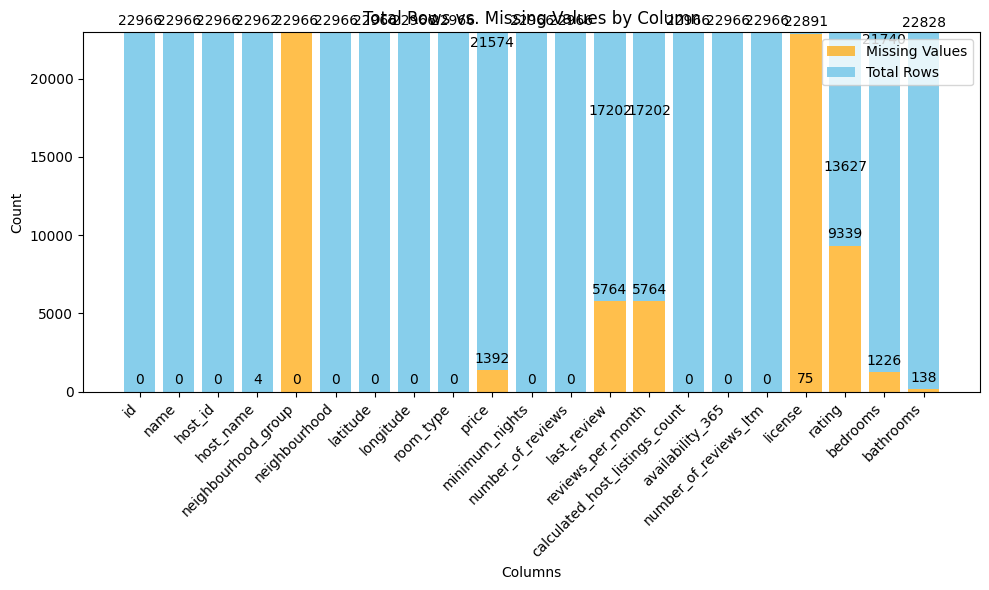

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_with_missing is your DataFrame with missing values

# Calculate the total number of rows for each column
total_rows = df.shape[0]

# Calculate the number of missing values for each column
missing_values_count = df.isnull().sum()

# Calculate the proportion of missing values for each column
missing_proportion = (missing_values_count / total_rows) * 100  # in percentage

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Missing values for each column
missing_bars = ax.bar(range(len(df.columns)), missing_values_count, color='orange', label='Missing Values', alpha=0.7)

# Total rows for each column
total_bars = ax.bar(range(len(df.columns)), df.count(), color='skyblue', label='Total Rows', bottom=missing_values_count)

# Set labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Count')
ax.set_title('Total Rows vs. Missing Values by Column')
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=45, ha='right')

# Add values on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(total_bars)
autolabel(missing_bars)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

- The probability of the missing values in the dataset is 38%, it suggests that approximately 8 out of the 21 of the observations are missing. This percentage indicates a relatively high occurrence of the missing data.
- the high occurrence of missing data in the Airbnb dataset may require careful handling to ensure that your analysis remains valid and insightful, while this can create limited insights, low statistical power and biased estimates.



In [ ]:
columns_to_drop = ['latitude','longitude','neighbourhood_group','reviews_per_month','last_review', 'license', 'host_name', 'id', 'host_id', 'neighbourhood', 'rating']
df.drop (columns =columns_to_drop , inplace = True)


- In order to handle the missing values which make up 38% of the dataset, we decided to drop latitude, longitude, neighbourhood_group, reviews_per_month, last_review, license, host_name, id, host_id, neighbourhood, rating.
- Rating has the highest number of missing values which make up 40% of the dataset, last_review and reviews_per_month make up 25% each of missing values withing the dataset.
- The remaining columns: latitude, longitude, neighbourhood_group, license, host_name, id and neighbourhood are not important columns for our linear regression analysis. These variables will not imrpove the efficiency of our analysis.

In [ ]:
df['bathrooms'].unique()

array(['1', '3', '2', '5', '4', nan, '32', '6', '8', '9', '0', '7', '16',
       '19', '10', '38', '11', '13', '12', '15', '28', '41'], dtype=object)

In [ ]:
df['bathrooms'].value_counts()

bathrooms
1     12023
5      4492
2      4461
3      1164
4       458
6        76
0        50
7        42
8        28
9        12
11        5
10        4
15        4
13        2
32        1
16        1
19        1
38        1
12        1
28        1
41        1
Name: count, dtype: int64

In [ ]:
df['bathrooms'] = df['bathrooms'].fillna(0)


In [ ]:
df['bedrooms'] = df['bedrooms'].fillna(0)

- The unique values within bathroom and bedrooms, indicated missing values of nan, we used dictionary function to change all the nan values to 0. In changing the numbers to 0, we are able to assess and analyse the dataset within our regression model to accurately predict whether price of the AirBnb depends on the number of bathrooms and bedrooms.

In [ ]:
df.dtypes

name                                object
room_type                         category
price                              float64
minimum_nights                       int64
number_of_reviews                    int64
calculated_host_listings_count       int64
availability_365                     int64
number_of_reviews_ltm                int64
bedrooms                            object
bathrooms                           object
dtype: object

In [ ]:
df['bedrooms']= df['bedrooms'].astype('int64')

In [ ]:
df['bathrooms']= df['bathrooms'].astype('int64')

- For bathrooms and bedrooms changed the data types from object to int64 in order to mathematically and statistically analysis if the bathrooms and bedrooms affect the price of the regression model.
- The aim of the improve the data quality and and ensure more reliable analysis using numerical values in order to better visualise and intrepret the model.

In [ ]:
df['price'].fillna(df['price'].mean(),inplace = True)
df['bedrooms'].fillna(df['bedrooms'].mean(),inplace = True)
df['bathrooms'].fillna(df['bathrooms'].mean(),inplace = True)

- In order to alleviate an other missing values within the dataset, we imputed the price, bedrooms and bathrooms with the mean. We used the mean to impute the dataset because it preserves the distribution of the data and ensures the data remains numeric and consistent allowing the dataset to visualize and analysis easier.
- Imputing these values with the mean help retain all rows in the dataframe, avoiding data loss that might occur if you were to drop rows with missing values.

In [ ]:
df.isna().sum()

name                              0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
bedrooms                          0
bathrooms                         0
dtype: int64

**Independant variables:**
Room type
Minimum nights
Number of reviews
Calculated host listings
Availability
Number of reviews ( last 12 months)
Bedrooms
Bathrooms

**Depedant variable:**
Price

In [ ]:
columns_to_drop = ['name']
df.drop (columns =columns_to_drop , inplace = True)


- The "name" column may not have a direct influence on the price of an Airbnb listing. Instead, it is more likely to represent the title or description of the listing and may not provide meaningful insights of the effect of predictive value (price).
- "name" is also categorical data, which complicates and creates assumptions within a linear regression model, therefore using other x varaibles such as room_type, availability, etc. will help better intrepret the predictive value.

# Variable Exploration

## Univariate Analysis

In [ ]:
df.head(10)

room_type     price  minimum_nights  number_of_reviews  \
0         0     650.0               3                 75   
1         0    4029.0               2                 45   
2         0    2000.0               4                  0   
3         1    2377.0               2                  7   
4         0    2500.0              14                  2   
5         0    2000.0               2                 11   
6         0     650.0               3                  0   
7         0     690.0              30                 23   
8         0  111607.0               4                  2   
9         0    1279.0               2                 15   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               306                      6   
1                               3               294                      6   
2                               4               354                      0   
3                               6                83                      0   
4                               1               365                      0   
5                               3                 0                      0   
6                               1                 0                      0   
7                               1               301                      0   
8                               5               264                      1   
9                               3               107                      1   

   bedrooms  bathrooms  
0         1          1  
1         3          3  
2         3          2  
3         1          5  
4         1          1  
5         2          5  
6         2          1  
7         1          1  
8         6          5  
9         1          1

### Descriptive Analytics for each column

#### Price



In [ ]:
print (df['price'].mean())
print(df['price'].min())
print(df['price'].max())
print(df['price'].std())
print(df['price'].mode())

4089.1881431352554
160.0
600850.0
9305.627499042692
0    4089.188143
Name: price, dtype: float64


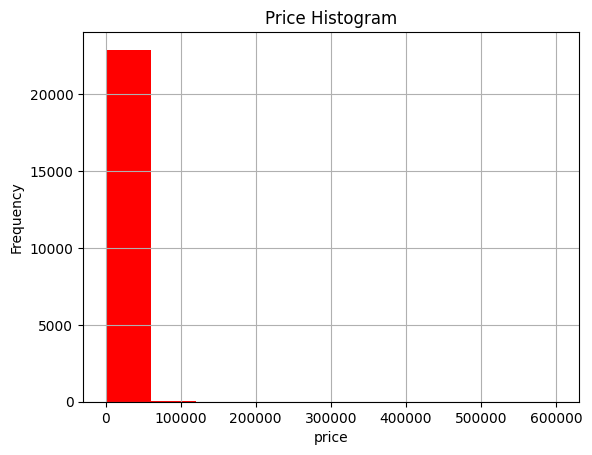

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['price'].hist(color='red')  # Plotting the histogram with red color
plt.xlabel('price')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Price Histogram')  # Adding title
plt.show()  # Displaying the plot


In [ ]:
df['price'].nunique()

4825

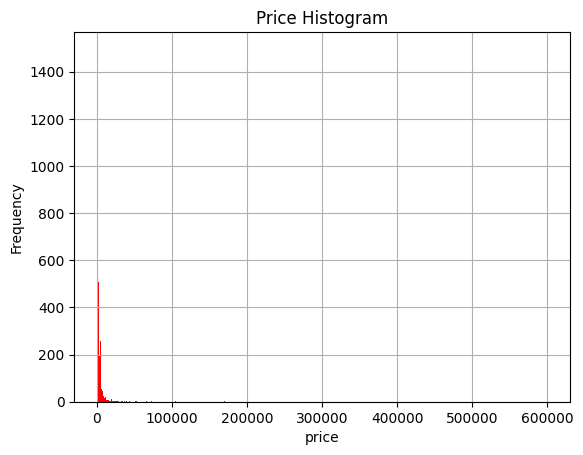

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['price'].hist(color='red', bins= 4825 )  # Plotting the histogram with red color and bin size of 4825
plt.xlabel('price')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Price Histogram')  # Adding title
plt.show()  # Displaying the plot


- The histogram of price is normally distributed with low standard deviation of 9305.63 indicates that the predictive value (price) is closer to the mean (4089.188). The min and max values suggests there is a wide range of prices which means there is high variability within the predictive value and indicates there may be outliers within the dataset.

#### Minimum Nights

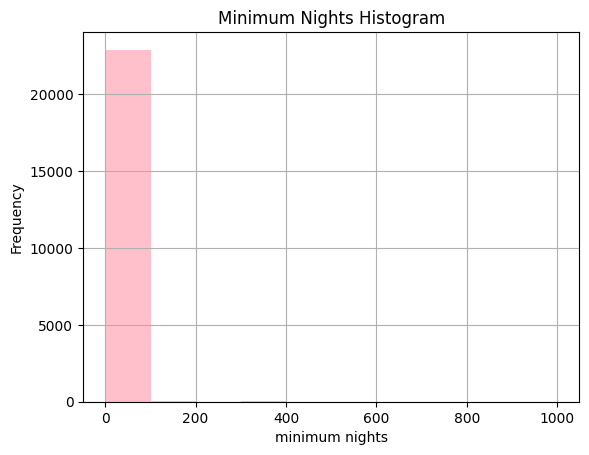

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['minimum_nights'].hist(color='pink')  # Plotting the histogram with red color
plt.xlabel('minimum nights')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Minimum Nights Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
df['minimum_nights'].nunique()

57

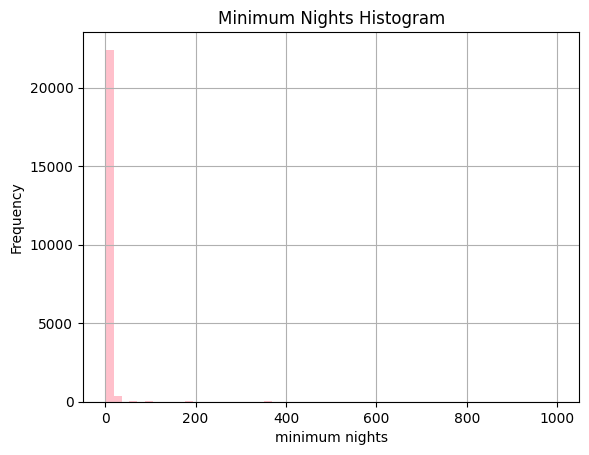

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['minimum_nights'].hist(color='pink', bins= 57 )  # Plotting the histogram with red color and bin size of 57
plt.xlabel('minimum nights')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Minimum Nights Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
print (df['minimum_nights'].mean())
print(df['minimum_nights'].min())
print(df['minimum_nights'].max())
print(df['minimum_nights'].std())
print(df['minimum_nights'].mode())

4.427936950274319
1
999
16.67552593060167
0    2
Name: minimum_nights, dtype: int64


- The histogram of minimum nights suggests there is normal distribution, it suggests there is high coefficient varaition between standard deviation (16.7) and the mean. This indicates the the data values are widely dispersed and not close to the mean of 4.43.
- The min and max value of minimum nights suggests there are outliers within the dataset, it suggests that people stay in within Airbnb for 1 night or maximum of 999 nights which dependant on the predicted value and other variables within the dataset.

#### Number of reviews


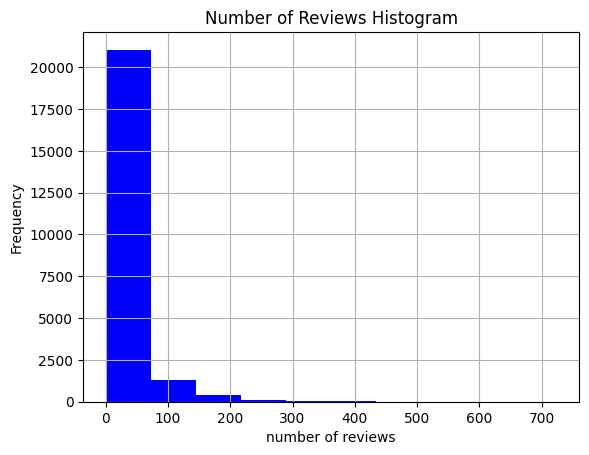

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['number_of_reviews'].hist(color='blue')  # Plotting the histogram with red color
plt.xlabel('number of reviews')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Number of Reviews Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
df['number_of_reviews'].nunique()

342

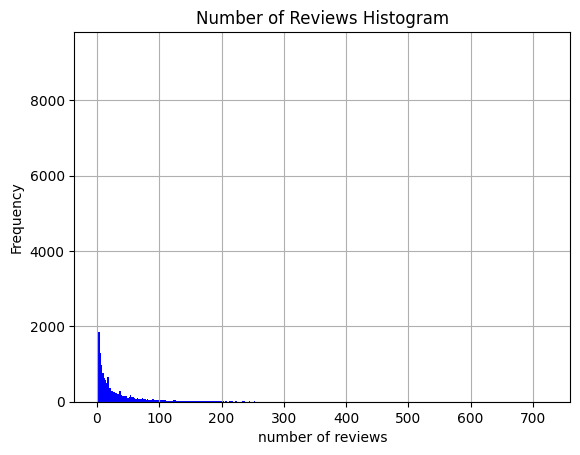

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['number_of_reviews'].hist(color='blue', bins= 342)  # Plotting the histogram with red color and bin size of 342
plt.xlabel('number of reviews')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Number of Reviews Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
print (df['number_of_reviews'].mean())
print(df['number_of_reviews'].min())
print(df['number_of_reviews'].max())
print(df['number_of_reviews'].std())
print(df['number_of_reviews'].mode())

21.929199686493078
0
724
43.51257685791086
0    0
Name: number_of_reviews, dtype: int64


- The histogram of the number of reviews suggests that there is a normal distribution. Assessing the standard deviation (43.5) and mean of (21.9) suggests there is high variability of the number of reviews.
- While the mode of 0, suggests that Airbnb listings do not recieve many reviews for their services.
- Looking at the graph of the histogram, the distribution is skewed to the right, because there are more values towards the left of the dataset than the right.
- In business concept may been that the min(0) reviews suggests the Airbnb property may be a new listing or there may be risk because there is no feeback to assess the quality or service of the accommodation. The max(724) assumes that there is popularity in the listing and there is quality and trustworthiness for the accommodation and the service provided.

#### Calculated_host_listings_count


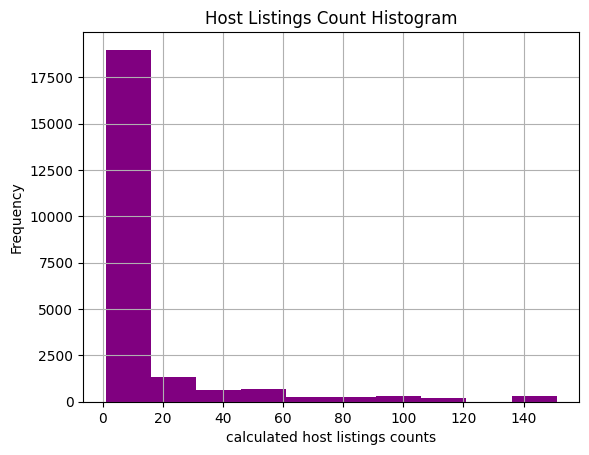

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['calculated_host_listings_count'].hist(color='purple')  # Plotting the histogram with red color
plt.xlabel('calculated host listings counts')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Host Listings Count Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
df['calculated_host_listings_count'].nunique()

65

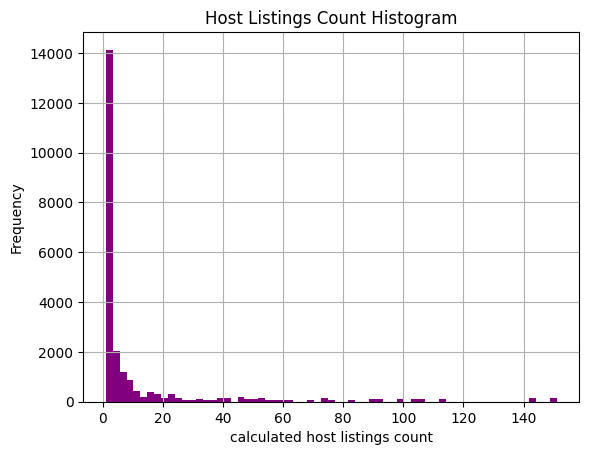

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['calculated_host_listings_count'].hist(color='purple', bins= 65)  # Plotting the histogram with red color and bin size of 65
plt.xlabel('calculated host listings count')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Host Listings Count Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
print (df['calculated_host_listings_count'].mean())
print(df['calculated_host_listings_count'].min())
print(df['calculated_host_listings_count'].max())
print(df['calculated_host_listings_count'].std())
print(df['calculated_host_listings_count'].mode())

12.159627275102325
1
151
25.80545279013477
0    1
Name: calculated_host_listings_count, dtype: int64


- The histogram of calculated host listings count suggests there is normal distribution, while the high standard deviation (25.8) over the mean (12.2) suggests there is high dispersion of data in the dataset suggesting that there is high accuracy of the number of listings, which is managed by a host.
- The min value (1) and the max (151) suggests that less experienced host manages fewer listings and the the more experienced host manages more listings.
- In the business context the calculated listings count is skewed to the right, which suggests that there are less experienced hosts that manage an Airbnb in Cape Town and that these hosts are new to the Airbnb business.

#### Availability


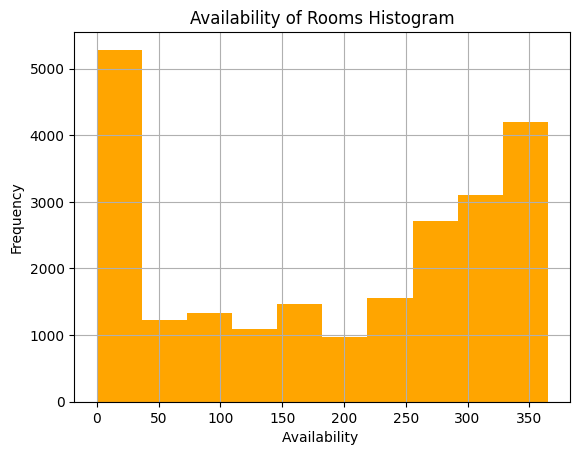

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['availability_365'].hist(color='orange')  # Plotting the histogram with red color
plt.xlabel('Availability ')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Availability of Rooms Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
df['availability_365'].nunique()

366

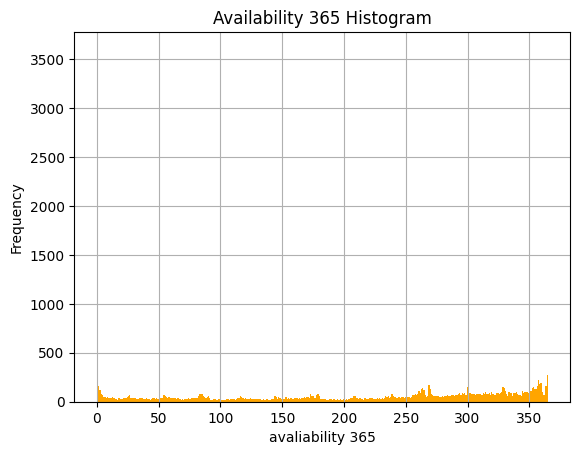

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['availability_365'].hist(color='orange', bins= 366)  # Plotting the histogram with red color and bin size of 366
plt.xlabel('avaliability 365')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Availability 365 Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
print (df['availability_365'].mean())
print(df['availability_365'].min())
print(df['availability_365'].max())
print(df['availability_365'].std())
print(df['availability_365'].mode())

188.53727248976747
0
365
131.61961461761723
0    0
Name: availability_365, dtype: int64


- This histogram of of availability, is close to a uniform distribution, but looking at the graph it a normal distributed,with the data being disperesed to the right of the scale suggesting a skewed left dataset.
- The mean (188.5) and the standard deviation (131.6) suggest there is low variability meaning the that the availability of Airbnb is closer to the average time an Airbnb is listed.
- Looking at the min (0) and the max( 365) suggests that the less availability of an Airbnb means there is higher demand for the listing than an Airbnb with a higher availability rate.
- The mode (0) suggests that there is high demand for the listing

#### Number_of_reviews_ltm (last 12 months)


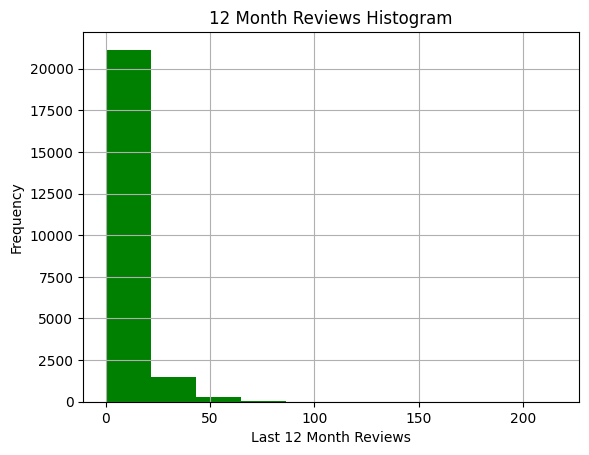

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['number_of_reviews_ltm'].hist(color='green')  # Plotting the histogram with red color
plt.xlabel('Last 12 Month Reviews')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('12 Month Reviews Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
df['number_of_reviews_ltm'].nunique()

101

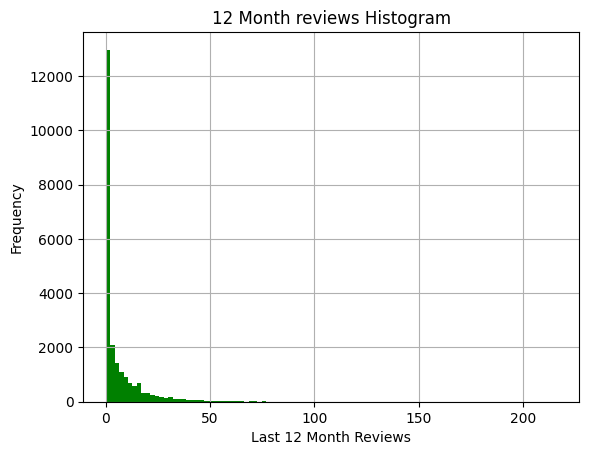

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['number_of_reviews_ltm'].hist(color='green', bins= 101)  # Plotting the histogram with red color and bin size of 3250
plt.xlabel('Last 12 Month Reviews')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('12 Month reviews Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
print (df['number_of_reviews_ltm'].mean())
print(df['number_of_reviews_ltm'].min())
print(df['number_of_reviews_ltm'].max())
print(df['number_of_reviews_ltm'].std())
print(df['number_of_reviews_ltm'].mode())

6.188887921274929
0
216
10.831815239790691
0    0
Name: number_of_reviews_ltm, dtype: int64


- The histogram of number of reviews in last 12 months suggests there is normal distribution of the data.
- The standard deviation is close to the mean which suggests that the data is distributed close to the mean, which indicates there is high presence of outliers within the the dataset and that the data values are spread towards the left, meaning they are skewed to the right.
- The min (0) and the max (216) suggests that in the span of 12 months there were less reviews for listings. The max value suggests that there is high reliability and high customer satisfaction and have high expectations for the Airbnb from previous reviews.
- The mode (0) suggests that the listing was also not a good listing and there was a decline in customer retention in the listings.


#### Bedrooms



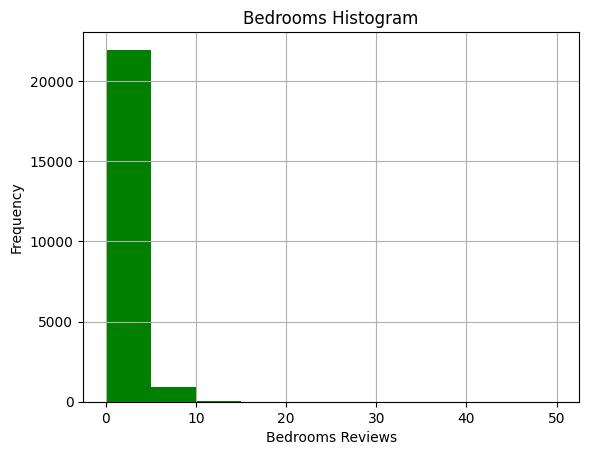

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['bedrooms'].hist(color='green')  # Plotting the histogram with red color
plt.xlabel('Bedrooms Reviews')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Bedrooms Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
df['bedrooms'].nunique()

24

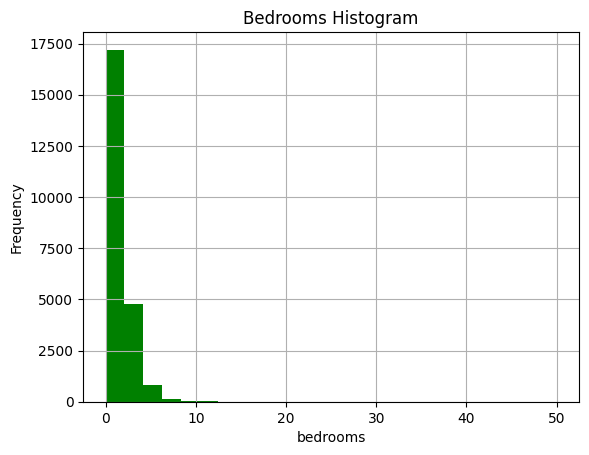

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['bedrooms'].hist(color='green', bins= 24)  # Plotting the histogram with red color and bin size of 24
plt.xlabel('bedrooms')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Bedrooms Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
print (df['bedrooms'].mean())
print(df['bedrooms'].min())
print(df['bedrooms'].max())
print(df['bedrooms'].std())
print(df['bedrooms'].mode())

1.9005486371157363
0
50
1.4716547172043506
0    1
Name: bedrooms, dtype: int64


- The histogram of bedrooms suggests there is normal distribution.
- The mean and the standard deviation are fairly equal, which suggests that the data points are spread around the mean, which means the distribution of the data is skewed to the right.
- The mode of the distribution is 0 and 1, which suggests that it is bimodal. It also suggests that individuals renting an Airbnb normally only has 1 bedroom. The 0 suggests that many not many individulas rent from Airbnb and would rather get a hotel or any other alternative.
- The max(50) suggests that it is a large property catering to large groups of people for events and managed by a property management company or professional hosts.

#### Bathrooms


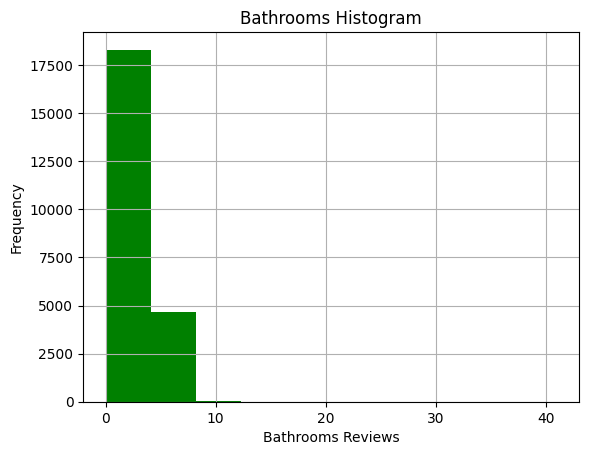

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['bathrooms'].hist(color='green')  # Plotting the histogram with red color
plt.xlabel('Bathrooms Reviews')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Bathrooms Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
df['bathrooms'].nunique()

21

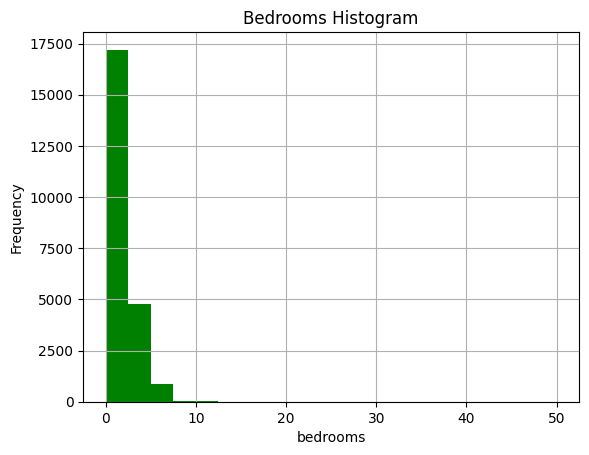

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['bedrooms'].hist(color='green', bins= 20)  # Plotting the histogram with red color and bin size of 20
plt.xlabel('bedrooms')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Bedrooms Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
print (df['bathrooms'].mean())
print(df['bathrooms'].min())
print(df['bathrooms'].max())
print(df['bathrooms'].std())
print(df['bathrooms'].mode())

2.1848819994774886
0
41
1.693123231215555
0    1
Name: bathrooms, dtype: int64


- The histogram of the bathrooms suggests that there is normal distribution of the dataset.
- The mean (2.18) and the standard deviation (1.7) are fairly close suggests that the data points are spread closer to the mean and skewed to the right, meaning that individuals that rent out Airbnb is less frequent.
- The min (0) suggests not many individuals rent out the Airbnb listing because of reviews or if it is a new listing.
- The max( 41) suggests that it is a large property which hosts events and large amount of guests.
- The dataset has a bimodal of 0 and 1. The 0 suggests that renting of the listing is less frequent, while the 1 suggests that the most common number of bathrooms among the listings is one and is reflective of typical property layouts.

#### Room Type

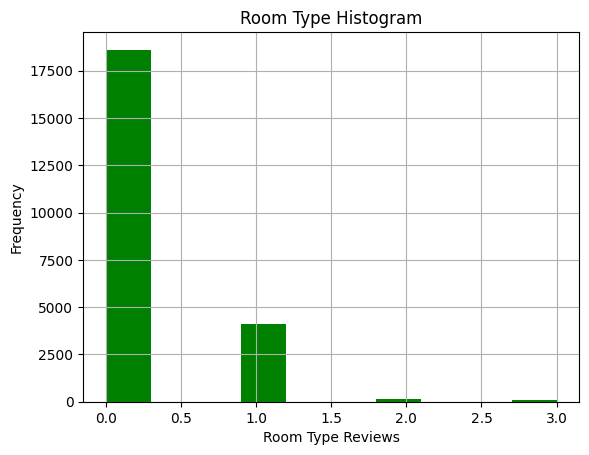

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['room_type'].hist(color='green')  # Plotting the histogram with red color
plt.xlabel('Room Type Reviews')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Room Type Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
df['room_type'].nunique()

4

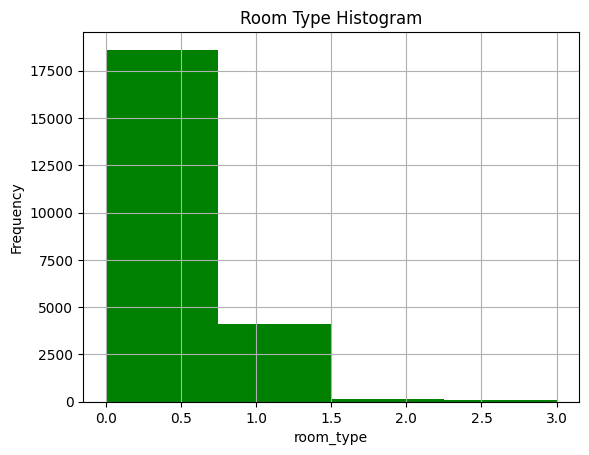

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame containing the data
df['room_type'].hist(color='green', bins= 4)  # Plotting the histogram with red color and bin size of 4
plt.xlabel('room_type')  # Adding x-label
plt.ylabel('Frequency')  # Adding y-label
plt.title('Room Type Histogram')  # Adding title
plt.show()  # Displaying the plot

In [ ]:
print(df['room_type'].mode())

0    0
Name: room_type, dtype: category
Categories (4, int64): [0, 2, 1, 3]


- The histogram for room type suggests that there is a normal distribution of the dataset.
- The mode of 0 reflects " entire home/apt" which means that individuals that rent out Airbnbs normally rent out entire homes or apartments.

### Boxplots for each column: Deleting outliers

#### Price

<Axes: >

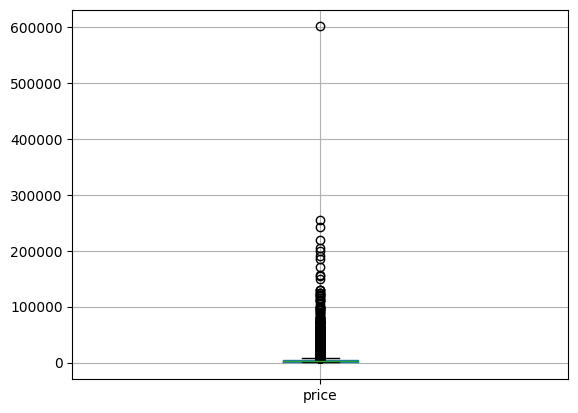

In [ ]:
df.boxplot('price')

In [ ]:
df = df[df['price']<20000]

In [ ]:
df.shape

(22373, 9)

<Axes: >

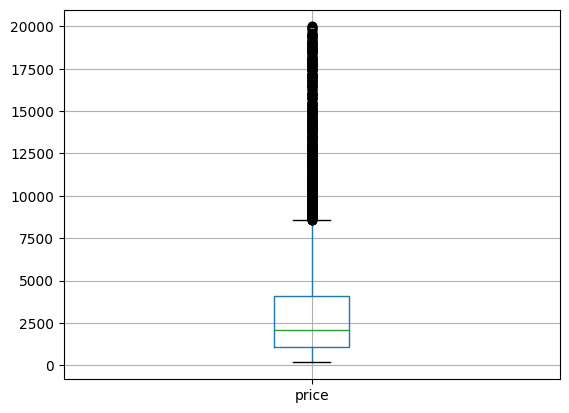

In [ ]:
df.boxplot('price')

- Summary of Price:
- 25th percentile: Between 1 and 1500
- 50th percentile: Between 1500 and 2400
- 75th percentile:Between 2400 and 8500
- Most of the prices are in the 75th percentile, which suggests that individuals that rent out Airbnb pay between 2400 and 8500, indicating a focus on luxury or premium accommodations.
- These guests might be willing to pay more for quality, comfort, and exclusivity.



#### Minimum Nights

<Axes: >

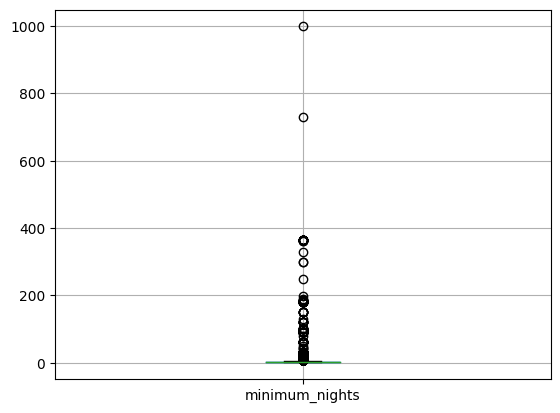

In [ ]:
df.boxplot('minimum_nights')

In [ ]:
df = df[df['minimum_nights']<30]

In [ ]:
df.shape

(22013, 9)

<Axes: >

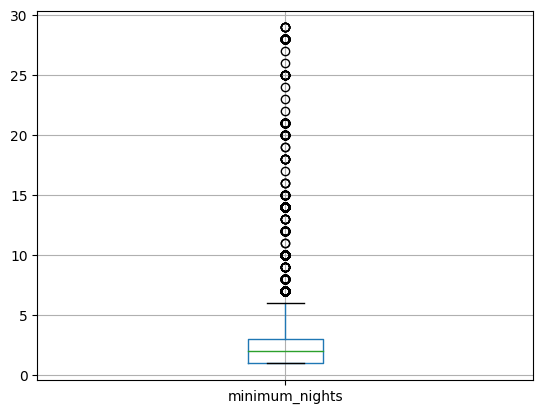

In [ ]:
df.boxplot('minimum_nights')

Summary of Minimum Nights
- 25th percentile: 1-2
- 50th percentile: 2-3
- 75th percentile: 3-6
- Most the minimum number of nights falls in the 75th percentile, which suggests that individuals rent out an Airbnb between 3-6 nights on average.
-Airbnb listings have a minimum stay requirement of 3 to 6 nights. This may reflect hosts' strategies to balance stable booking patterns, increased revenue, and efficient property management.










#### Number of Reviews

<Axes: >

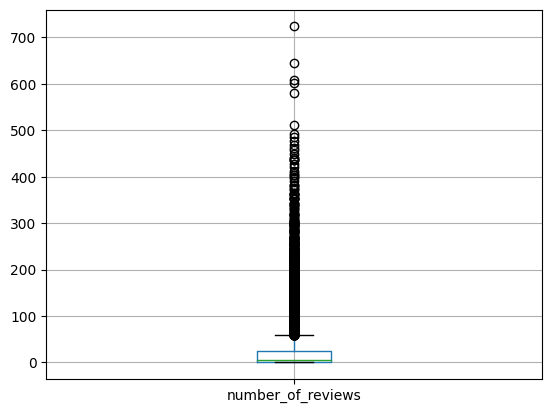

In [ ]:
df.boxplot('number_of_reviews')

In [ ]:
df = df[df['number_of_reviews']<240]

In [ ]:
df.shape

(21859, 9)

<Axes: >

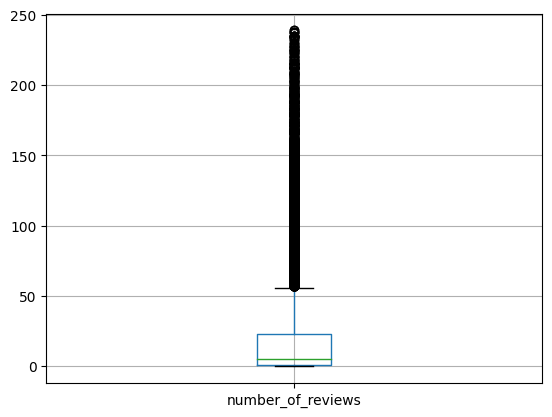

In [ ]:
df.boxplot('number_of_reviews')

Summary of Number of Reviews
- 25th percentile: 0
- 50th percentile: 0-7
- 75th percentile: 7-20
- Most of the number of reviews are in the 75th percentile, this suggests that that most Airbnb listings receive a moderate amount of reviews, while many listings have few or no reviews.

#### Calculated Host Listings

<Axes: >

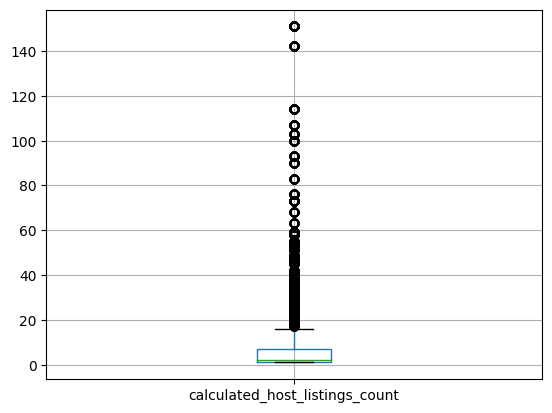

In [ ]:
df.boxplot('calculated_host_listings_count')

Summary of calculated host listings count
- 25th percentile: 1
- 50th percentile: 1-2
- 75th percentile: 2-18
- Most of the calculated host listings fall within the 75th percentile, which suggests that a significant portion of hosts manage multiple properties on Airbnb, indicating a higher level of experience and potentially more professional hosting practices.

#### Availability

<Axes: >

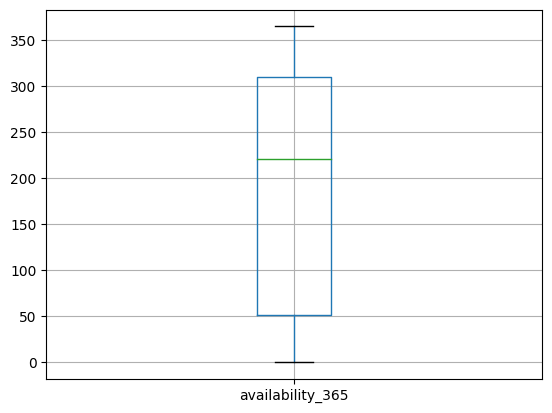

In [ ]:
df.boxplot('availability_365')

Summary of Avaliability:
- 25th percentile: 1-50
- 50th percentile: 50-220
- 75th percentile: 220 -360
- The number of availability normally falls in the 75th percentile, which indicates that most Airbnb listings have a high number of available days per year. This may indicate a competitive market and potential opportunities for hosts to optimize their listings for better occupancy and revenue.

#### Last 12 Month Reviews

<Axes: >

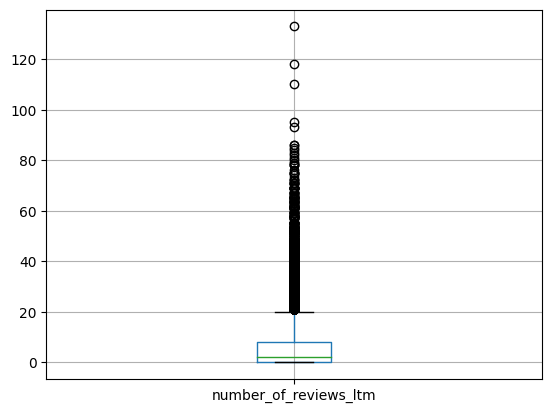

In [ ]:
df.boxplot('number_of_reviews_ltm')

In [ ]:
df = df[df['number_of_reviews_ltm']<85]

In [ ]:
df.shape

(21851, 9)

<Axes: >

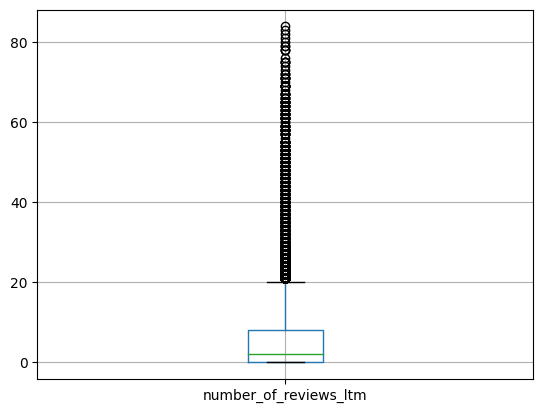

In [ ]:
df.boxplot('number_of_reviews_ltm')

Summary of number of reviews for the last 12 months
- 25th percentile: 0
- 50th percentile: 0-4
- 75th percentile: 4-20
- Most of the reviews for last 12 months are within the 75th percentile, this suggests that Airbnb received a moderate number of reviews in the past year.
- Hosts can leverage this data to understand their performance and focus on areas that may need attention to improve guest experiences and attract more reviews in the future.

#### Bathrooms

<Axes: >

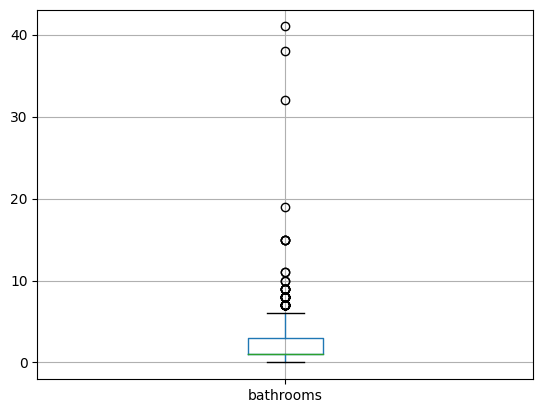

In [ ]:
df.boxplot('bathrooms')

Summary of bathrooms
- 25th percentile: 0-2
- 50th percentile: 2-4
- 75th percentile: 4-7
- There are more bathrooms within the 75th percentile, which suggests that the Airbnb listings may be luxury or premium properties, offering guests more amenities and convenience or catering to larger group of people.
- Listings with a higher number of bathrooms may be more common in certain areas, such as upscale neighborhoods or popular vacation destinations, where luxury accommodations are in demand.

#### Bedrooms

<Axes: >

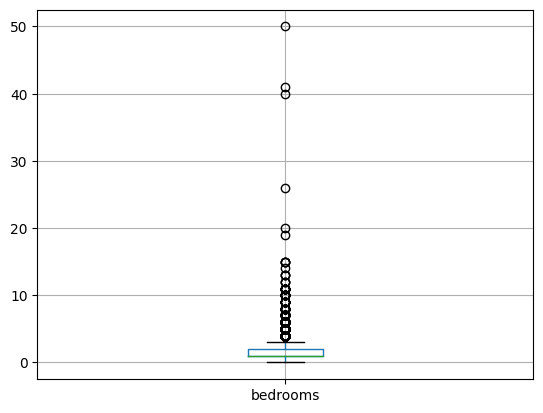

In [ ]:
df.boxplot('bedrooms')

Summary of the Bedrooms
- 25th percentile: 0 -2
- 50th percentile: 2-3
- 75th percentile: 3-4
- Most of the number of bedrooms are in the 25th percentile, this suggests that individuals rent out 0-2 bedroom Airbnb listings, this suggests that smaller properties, such as studios or one-bedroom apartments, are more commonly rented out on Airbnb.
- Smaller properties may experience higher occupancy rates, especially in high-demand areas, due to their affordability and suitability for short stays.




```
# This is formatted as code
```

## Bivariate Anaysis

In [ ]:
df.head(10)

room_type   price  minimum_nights  number_of_reviews  \
0          0   650.0               3                 75   
1          0  4029.0               2                 45   
2          0  2000.0               4                  0   
3          1  2377.0               2                  7   
4          0  2500.0              14                  2   
5          0  2000.0               2                 11   
6          0   650.0               3                  0   
9          0  1279.0               2                 15   
10         1  1091.0               7                  0   
11         0   700.0               2                113   

    calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                                1               306                      6   
1                                3               294                      6   
2                                4               354                      0   
3                                6                83                      0   
4                                1               365                      0   
5                                3                 0                      0   
6                                1                 0                      0   
9                                3               107                      1   
10                               1                 0                      0   
11                               5               292                     22   

    bedrooms  bathrooms  
0          1          1  
1          3          3  
2          3          2  
3          1          5  
4          1          1  
5          2          5  
6          2          1  
9          1          1  
10         1          2  
11         1          1

In [ ]:
df.shape

(21851, 9)

###Scatterplot

Here we are going to create some Scatter Plot to make all of the data visualziation easier to to analyze. We are going to create some combinations, all of them are related to Price, here they are:

Combinations:

- Price and Availability
- Price and Minimum Nights
- Price and Number of Reviews
- Price and Calculated Host Listings Count
- Price and Number of Reviews LTM
- Price and Bathrooms
- Price and Bedrooms


The code used for this step of he paper was used to create a scatter plot, which is a type of bivariate analysis. Also the same code was used as a fundation for the next codes, but the title, columns and and range of scale were adapted to its scatters.

This kind of analysis looks at two variables simultaneously to explore any relationships or correlations between them. We decided to use this scatter because is a clear way to see the correlation between price and availabilty, which is the main focus of our project.

In this case, the variables are 'price' and 'availability_365' from a dataset presumably containing information about listings, such as rental properties or hotel rooms.

Here's a step-by-step explanation of what each part of the script does, without embedding the explanations as comments in the code:

Import Libraries: The script assumes that matplotlib.pyplot and pandas are already imported. matplotlib.pyplot is commonly used for creating visualizations in Python, and pandas is typically used for data manipulation and analysis.

Set Up the Plot: The command plt.figure(figsize=(10, 6)) initializes a new figure for plotting with a specified size of 10 inches in width and 6 inches in height. This size setting helps ensure that the plot is large enough to be easily readable and that the details are not cramped.

Create a Scatter Plot: The function plt.scatter is called with two main arguments: df['price'] and df['availability_365']. These arguments represent the data points that will be plotted:

df['price'] refers to the prices from the DataFrame df. This data forms the x-coordinates of the scatter plot.

df['availability_365'] refers to the availability (measured in days per year) from the DataFrame df. This data forms the y-coordinates of the scatter plot.
The parameter alpha=0.5 is used to set the transparency of the points on the plot. A lower alpha value (closer to 0) makes the points more transparent, which can help in visualizing overlapping data points by reducing overplotting, making it easier to see the density of points.

Customize Plot Titles and Labels: The following commands add descriptive titles and labels to the plot:

plt.title('Price X Availability') sets the title of the scatter plot.
plt.xlabel('Availability') and plt.ylabel('Price') label the x-axis and y-axis, respectively, clearly indicating what each axis represents.

Grid Lines: The command plt.grid(True) enables the grid lines on the plot. Grid lines are helpful for better visual alignment and estimation of the plotted data points' values against the axes.

Display the Plot: Finally, plt.show() is called to display the plot. This function ensures that all the settings are compiled and renders the plot to the screen.

The overall purpose of this visualization is to explore whether there's a visible pattern or correlation between the price of a listing and its availability throughout the year. For instance, higher-priced listings might have different availability patterns compared to lower-priced ones, which could suggest trends in consumer preference or seasonal demand variations.

- Results of The Analysis


The scatter plot presented show in the Y axis a range of Availability of 0 to 350 and a x Axis a range of price of 0 to 20,000 - In the Scatterplot we can see that the data presented has no relationship, the way the data is spread shows that is "randomly" distributed, which is impossible to a relationship.

Following the same code used in the last Scatter Plot, but with a little changes just to address with Calculated Host Listings Count x Price.

As result of the analysis it is possible to see in the X axis a range between 0 to 140, in the y axis 0 to 20,000, we can see that the scatter plot starts with highers numbers, in the middle we have less data and in the end we start having higher numbers again. This results in a normal distribution for the analyze.

As result of the analysis, we are having a range of Minimum Nights between 0 to 30 and A price between 0 to 20,000, for the Scatter Plot we can conclude that the data proposed is skewed to the right, because in the beginning of the graph we have more data. The data we have for this initial part can be correlated to the number of people that uses Airbnb for only 7 days.

As result of the analysis we find the number of reviews in the X axis in a range between 0 to 250, for the Price, a range between 0 to 20,000. The Scatter Plot shows a few outliers and the majority of the data is skewing to the right, we right numbers in the beginning and smaller numbers in the end.




As result of the analysis, for Number of Reviews in the Last 12 Months in a range of 0 to 80 reviews, and the Price in the Y axis in a range between 0 to 20,000, most of the people don't give reviews, we can se the amount of blue balls in, wwhich represents our data, in the 0, and than dropping.

### Correlation Coeffiecient

Now we are using all of the Scatterplot to find the Correlation Coeffiecient between all of our varriants. This data is utterly important for our analysis method. It shows if the price of the rooms has any correlation with  Availability, Minimum Nights, Number of Reviews, Calculated Host Listings Count, or with Number of Reviews LTM.

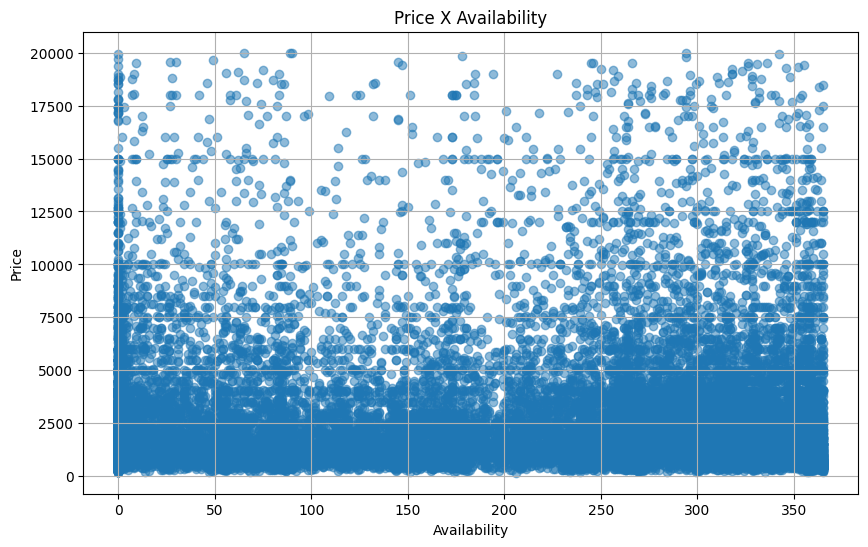

Correlation Coefficient between Price and Availability: -0.01826006626970043


In [ ]:
import matplotlib.pyplot as plt

# The idea behind the Bivariate analysis is looking to two different varaibles at the same time. Here we are looking to the Price and Number of number of reviews ltm, which represents the number of revies last 12 months, between restaurants, cafes, malls etc.
# (number_of_reviews_ltm), creating a scatter to understand the correlation between these values
# Assuming df is our pandas DataFrame
# And also make that we have imported pandas and matplotlib

# Plotting and marking our variables
plt.figure(figsize=(10, 6))
plt.scatter(df['availability_365'], df['price'], alpha=0.5)
plt.title('Price X Availability')
plt.xlabel('Availability')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# Now we are going to calculate the correlation coefficient, which is one of the most important steps to understand the correlation betwhen our numbers.
correlation_coefficient = df['availability_365'].corr(df['price'])
print("Correlation Coefficient between Price and Availability:", correlation_coefficient)

**As Result of The Analysis**

As result of the analysis it is possible to see in the X axis a range between 0 to 350, which is the availabilty of the rooms, in the y axis 0 to 20,000, which is price. This Scattterplot results in a no relationship for the analyze. The code used to identify the correlation between availability and price shows the correlation of -0.018, which is extremely weak, which suggests that there is no linear relationship between price and availability.

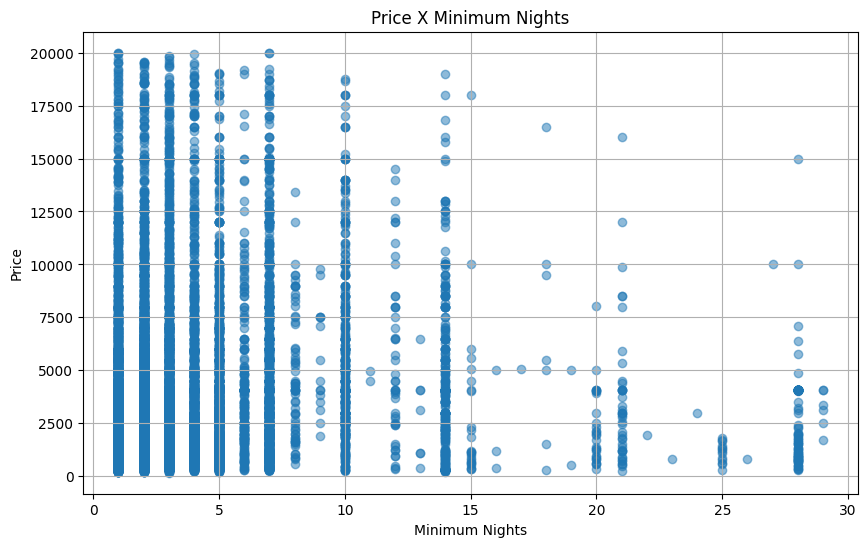

Correlation Coefficient between Price and Minimum Nights: 0.17089346184334286


In [ ]:
import matplotlib.pyplot as plt

# The idea behind the Bivariate analysis is looking to two different varaibles at the same time. Here we are looking to the Price and Number of number of reviews ltm, which represents the number of revies last 12 months, between restaurants, cafes, malls etc.
# (number_of_reviews_ltm), creating a scatter to understand the correlation between these values
# Assuming df is our pandas DataFrame
# And also make that we have imported pandas and matplotlib

# Plotting and marking our variables
plt.figure(figsize=(10, 6))
plt.scatter(df['minimum_nights'], df['price'], alpha=0.5)
plt.title('Price X Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# Now we are going to calculate the correlation coefficient, which is one of the most important steps to understand the correlation betwhen our numbers.
correlation_coefficient = df['minimum_nights'].corr(df['price'])
print("Correlation Coefficient between Price and Minimum Nights:", correlation_coefficient)

**As Result of The Analysis**

The Scatterplot shows a range of Minimum Nights between 0 to
30 in the X axis, and for the Y axis a price between 0 to 20,000, for the Scatter Plot we can conclude that the data proposed is skewed to the right, because in the beginning of the graph we have more data and after this, less data were presented. The data we have for this initial part can be correlated to the number of people that uses Airbnb for only 7 days. Also the correlation is 0.17, which is still low but higher than the correlation of price x availability.



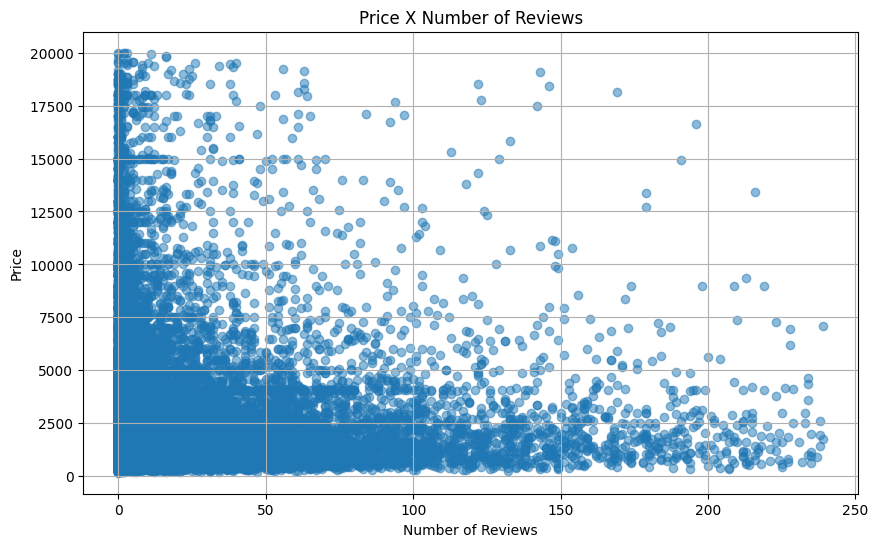

Correlation Coefficient between price and Number of Reviews: -0.06217063237590299


In [ ]:
import matplotlib.pyplot as plt

# The idea behind the Bivariate analysis is looking to two different varaibles at the same time. Here we are looking to the Price and Number of number of reviews ltm, which represents the number of revies last 12 months, between restaurants, cafes, malls etc.
# (number_of_reviews_ltm), creating a scatter to understand the correlation between these values
# Assuming df is our pandas DataFrame
# And also make that we have imported pandas and matplotlib

# Plotting and marking our variables
plt.figure(figsize=(10, 6))
plt.scatter(df['number_of_reviews'], df['price'], alpha=0.5)
plt.title('Price X Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# Now we are going to calculate the correlation coefficient, which is one of the most important steps to understand the correlation betwhen our numbers.
correlation_coefficient = df['number_of_reviews'].corr(df['price'])
print("Correlation Coefficient between price and Number of Reviews:", correlation_coefficient)

**As Result of The Analysis**

It is possible to find the Number of Reviews in the X axis in a range between 0 to 250, for the Price in the Y axis, a range between 0 to 20,000. The Scatter Plot shows a few outliers and the majority of the data is skewing to the right, we high numbers in the beginning and less data in the end. Also is possible to see a very low correlation between Number and reviews and Price, which is -0.06. This fact shows that the Price and The Number of Reviews are not correlated.

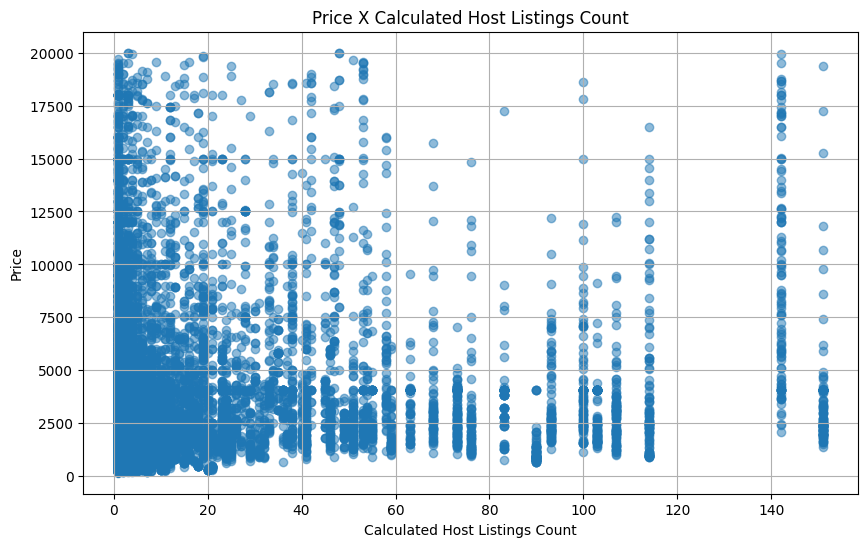

Correlation Coefficient between price and Calculated Host Listings Count: 0.14108553853801087


In [ ]:

import matplotlib.pyplot as plt

# The idea behind the Bivariate analysis is looking to two different varaibles at the same time. Here we are looking to the Price and Number of number of reviews ltm, which represents the number of revies last 12 months, between restaurants, cafes, malls etc.
# (number_of_reviews_ltm), creating a scatter to understand the correlation between these values
# Assuming df is our pandas DataFrame
# And also make that we have imported pandas and matplotlib

# Plotting and marking our variables
plt.figure(figsize=(10, 6))
plt.scatter(df['calculated_host_listings_count'], df['price'], alpha=0.5)
plt.title('Price X Calculated Host Listings Count')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# Now we are going to calculate the correlation coefficient, which is one of the most important steps to understand the correlation betwhen our numbers.
correlation_coefficient = df['calculated_host_listings_count'].corr(df['price'])
print("Correlation Coefficient between price and Calculated Host Listings Count:", correlation_coefficient)

**As Result of The Analysis**

It is possible to see the Calculated Host Listing Count in the X axis in a range between 0 to 140, for the Price in the Y axis, a range between 0 to 20,000. The Scatter Plot shows a few outliers and the majority of the data is in the left side, it has higher numbers in the beginning and less data in the middle. Also is possible to see a low correlation between Price and Calculated Host Listing Count, which is 0.14.

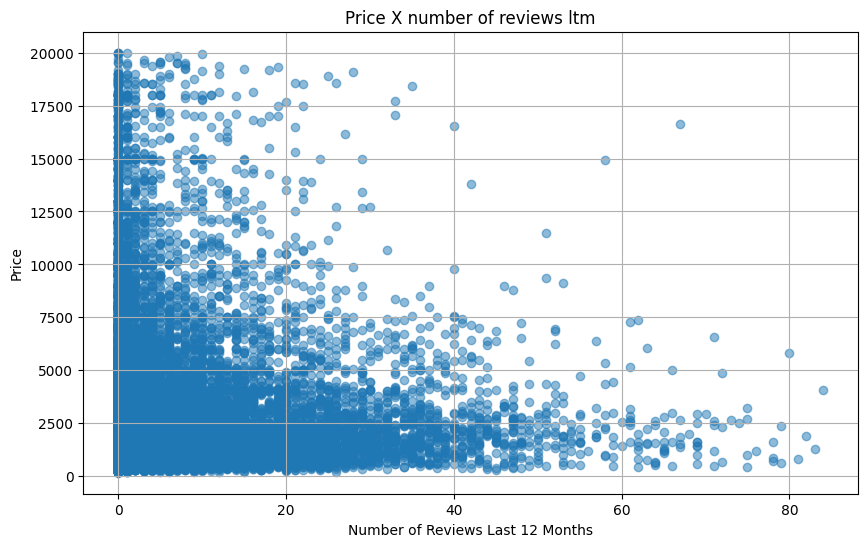

Correlation Coefficient between Price and Number of Reviews Last 12 Months: -0.05792393769875807


In [ ]:
import matplotlib.pyplot as plt

# The idea behind the Bivariate analysis is looking to two different varaibles at the same time. Here we are looking to the Price and Number of number of reviews ltm, which represents the number of revies last 12 months, between restaurants, cafes, malls etc.
# (number_of_reviews_ltm), creating a scatter to understand the correlation between these values
# Assuming df is our pandas DataFrame
# And also make that we have imported pandas and matplotlib

# Plotting and marking our variables
plt.figure(figsize=(10, 6))
plt.scatter(df['number_of_reviews_ltm'], df['price'], alpha=0.5)
plt.title('Price X number of reviews ltm')
plt.xlabel('Number of Reviews Last 12 Months')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# Now we are going to calculate the correlation coefficient, which is one of the most important steps to understand the correlation betwhen our numbers.
correlation_coefficient = df['number_of_reviews_ltm'].corr(df['price'])
print("Correlation Coefficient between Price and Number of Reviews Last 12 Months:", correlation_coefficient)

**As Result of The Analysis**

As a X axis we have the Number of Reviews in the Last 12 Months in a range of 0 to 80 reviews in the X axis, and the Price in the Y axis in a range between 0 to 20,000, most of the people don't give reviews, we can see the amount of blue balls in, which represents our data, in the 0, and than dropping. This fact shows that most of the peolpe don't give reviews.

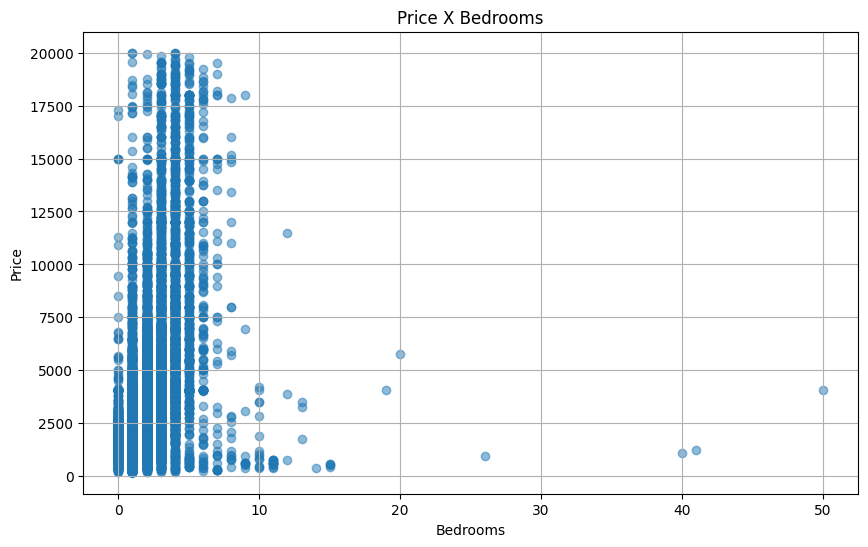

Correlation Coefficient between Price and Bedrooms: 0.4815349031215421


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is our pandas DataFrame

# Plotting and marking our variables
plt.figure(figsize=(10, 6))
plt.scatter(df['bedrooms'], df['price'], alpha=0.5)
plt.title('Price X Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient between price and bedrooms
correlation_coefficient = df['bedrooms'].corr(df['price'])
print("Correlation Coefficient between Price and Bedrooms:", correlation_coefficient)


**As Result of The Analysis**

In the X axis we can see the Bedrooms in a range of 0 to 50, and the Price in the Y axis in a range between 0 to 20,000, with a correlation of 0.48. The highest correlation that we found in the paper until now, this shows that people care more about the number of bedrooms than other variables.

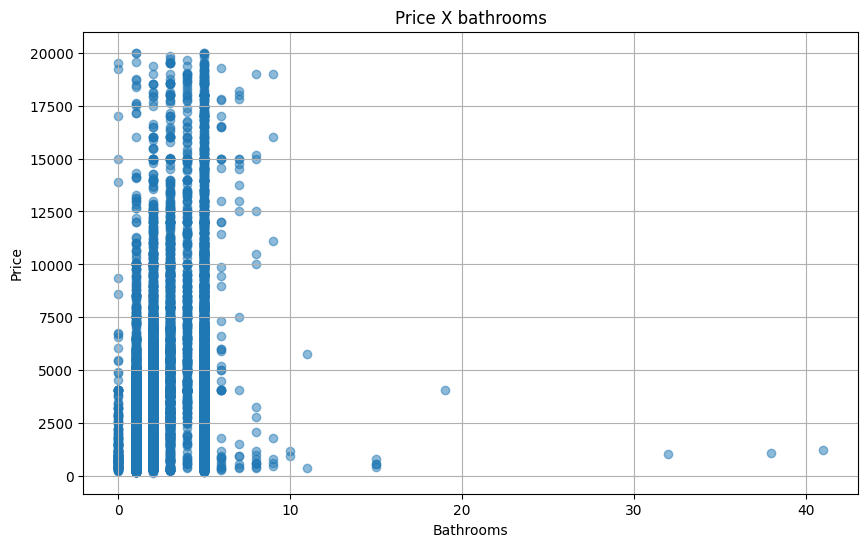

Correlation Coefficient between Price and Bathrooms: 0.4107416023508496


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is our pandas DataFrame

# Plotting and marking our variables
plt.figure(figsize=(10, 6))
plt.scatter(df['bathrooms'], df['price'], alpha=0.5)
plt.title('Price X bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient between price and bedrooms
correlation_coefficient = df['bathrooms'].corr(df['price'])
print("Correlation Coefficient between Price and Bathrooms:", correlation_coefficient)


**As Result of The Analysis**

In the X axis we can see the number of bathrooms in a range of 0 to 40, and the Price in the Y axis in a range between 0 to 20,000, with a correlation of 0.41. This shows that people care more about the number of bedrooms and also to bathrooms when they are picking a place to stay


###Line Charts

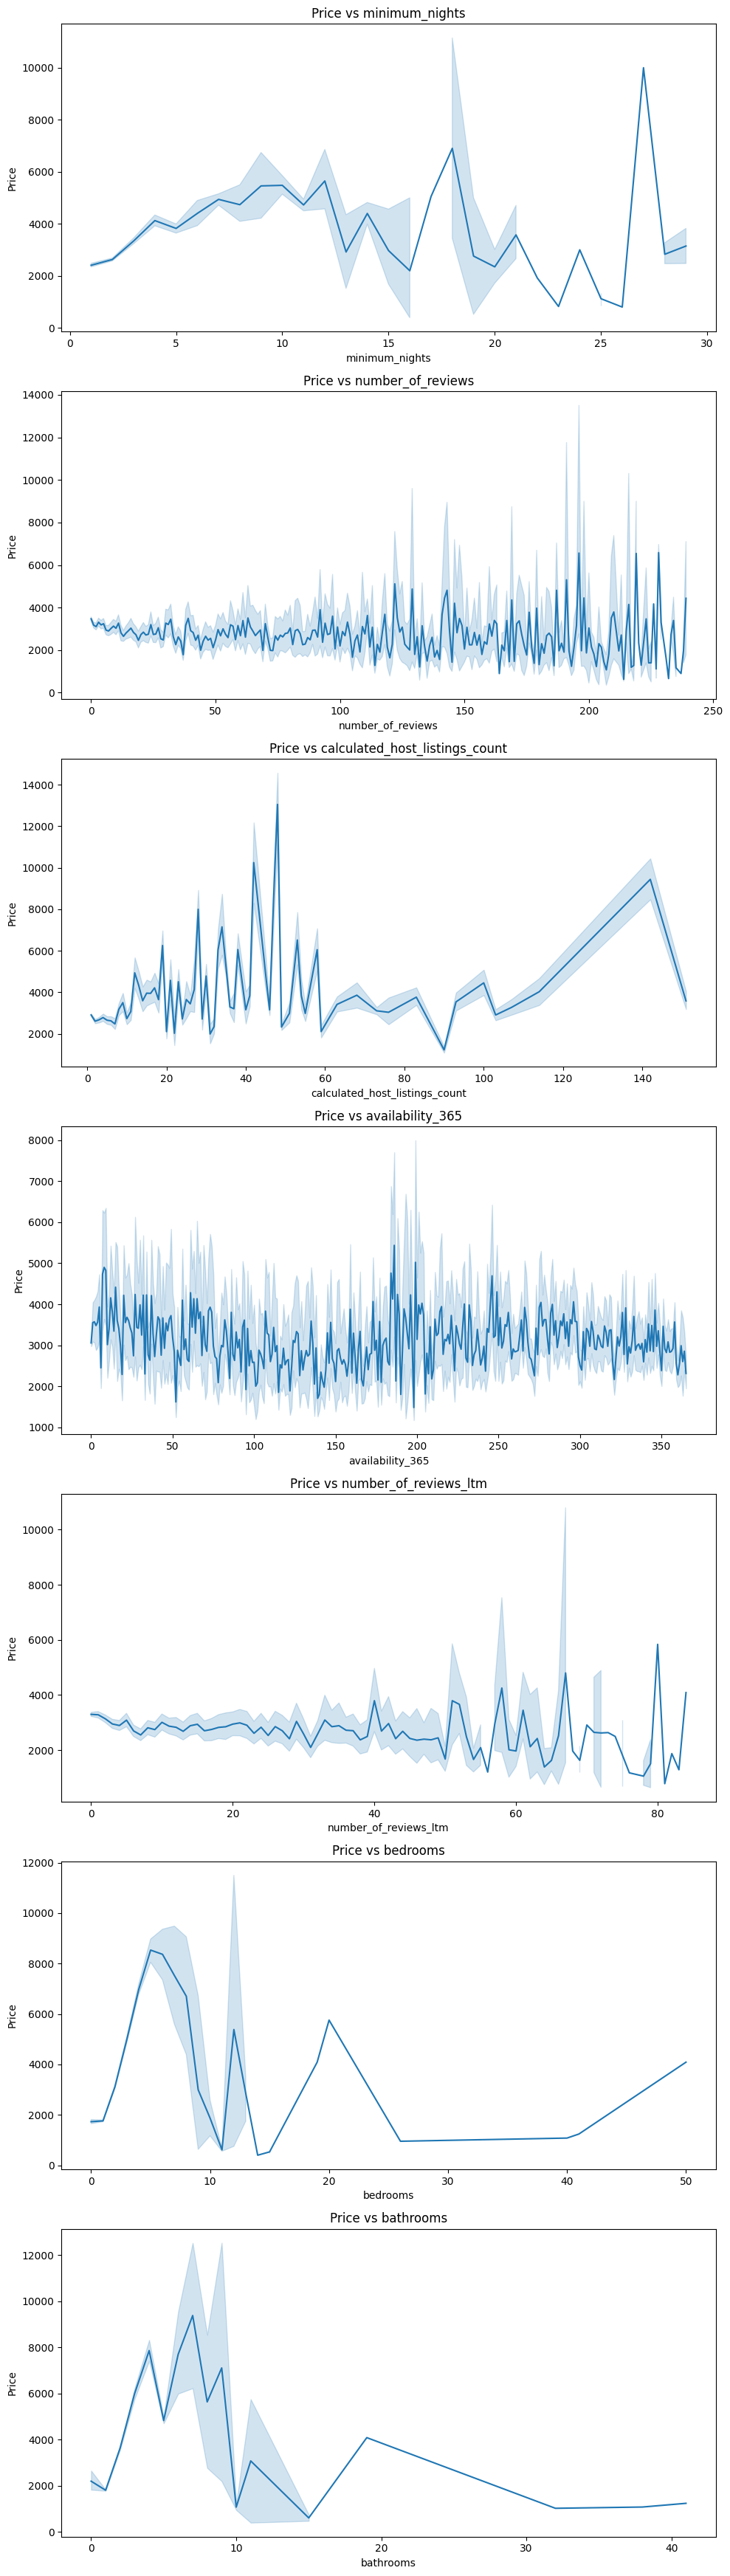

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataframe here
# df = pd.read_csv('your_dataframe.csv')

# List of columns to compare with price
columns_to_compare = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
                      'availability_365', 'number_of_reviews_ltm', 'bedrooms', 'bathrooms']

# Setting up the figure and axes for the plots
fig, axes = plt.subplots(nrows=len(columns_to_compare), figsize=(10, 5 * len(columns_to_compare)))

# Loop through the numerical columns and create a line chart for each
for i, column in enumerate(columns_to_compare):
    if df[column].dtype in ['int64', 'float64']:  # Check if the column is numerical
        sns.lineplot(x=df[column], y=df['price'], ax=axes[i])
        axes[i].set_title(f'Price vs {column}')
        axes[i].set_ylabel('Price')
        axes[i].set_xlabel(column)
    else:  # For non-numerical columns, create a box plot
        sns.boxplot(x=df[column], y=df['price'], ax=axes[i])
        axes[i].set_title(f'Price Distribution by {column}')
        axes[i].set_ylabel('Price')
        axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


**Going Through The Code**

The code begins by importing necessary libraries: matplotlib.pyplot for plotting, seaborn for enhanced statistical plots, and pandas for data manipulation. It assumes the existence of a pandas DataFrame named df loaded with relevant data. A list of specific columns is defined to compare with the 'price' column in the dataset. The script sets up a plotting area with multiple subplots arranged vertically, one for each column in the list. For each column, it checks whether the data type is numerical. If it is, a line plot is created showing how 'price' varies with that column. If the column contains non-numerical data, a box plot is generated instead to display the distribution of 'price' across the different categories in the column. Each plot is labeled appropriately with titles and axis labels. The layout is adjusted to prevent any overlap between plots, ensuring clear visibility for each subplot when displayed.

**Analysis**

Here we created a line chart code to make a visualization of the data better. Going through the graphs we can see different comparisons with price, there is possible to see how each variable acts with the y axis, which is Price. Also we make sure that the ranges on the graph covers all of the data and outliers that we have.
The comparisons we made are these:
- Price and Availability
- Price and Minimum Nights
- Price and Number of Reviews
- Price and Calculated Host Listings Count
- Price and Number of Reviews LTM
- Price and Bathrooms
- Price and Bedrooms

Also we decided to use only one code to make the explanation faster in the way that someone is reading.

###Bar Plots

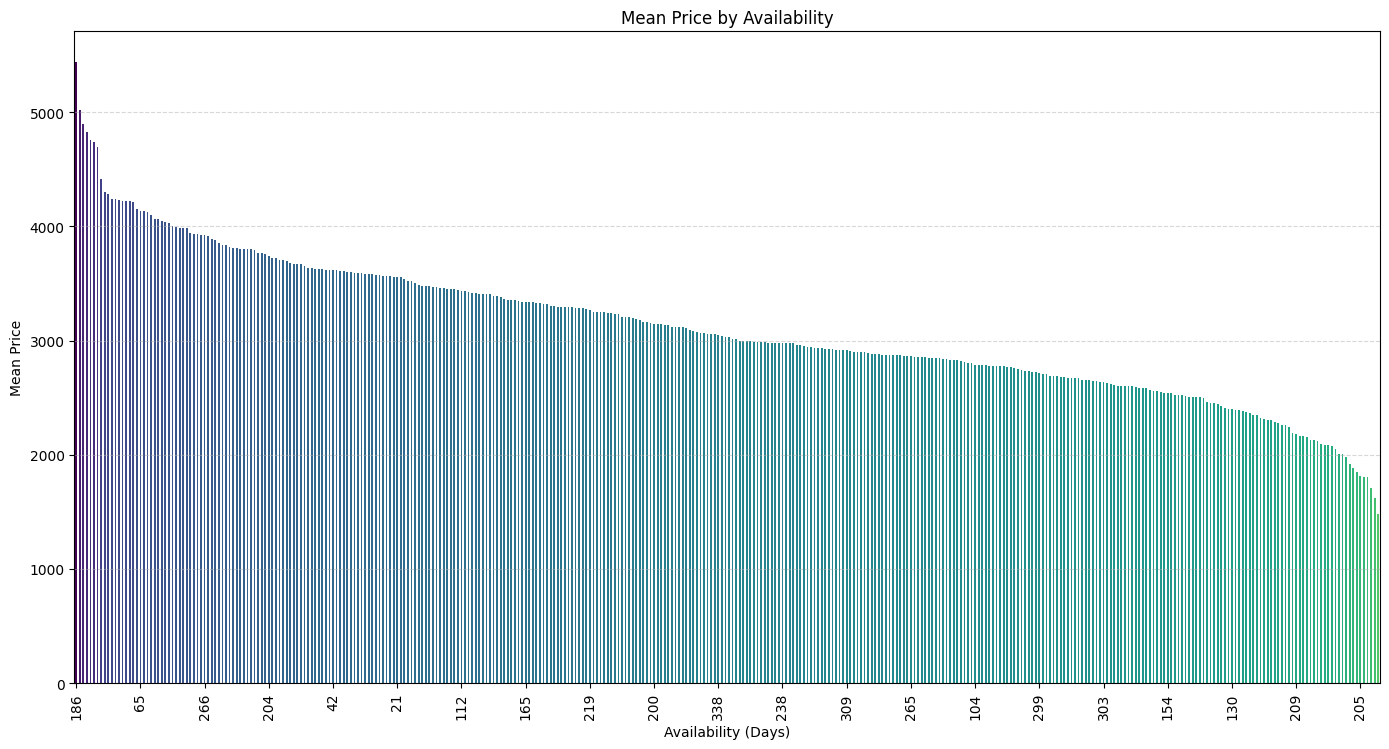

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the data
# Calculate the mean price for each availability
mean_price_by_availability_365 = df.groupby('availability_365')['price'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(14, 8))  # Increase figure size for better visibility
bar_colors = plt.cm.viridis_r(mean_price_by_availability_365 / float(max(mean_price_by_availability_365)))  # Color map based on price values
mean_price_by_availability_365.plot(kind='bar', color=bar_colors)  # Plot the bar plot
plt.title('Mean Price by Availability')  # Add a title
plt.xlabel('Availability (Days)')  # Add label for x-axis
plt.ylabel('Mean Price')  # Add label for y-axis
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels for vertical alignment

# Adjust x-ticks to display less frequently to reduce crowding
# Calculate a suitable interval based on the number of data points
tick_interval = max(len(mean_price_by_availability_365) // 20, 1)
tick_positions = range(0, len(mean_price_by_availability_365), tick_interval)
plt.xticks(ticks=tick_positions, labels=[mean_price_by_availability_365.index[i] for i in tick_positions])  # Apply the new x-ticks

plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add horizontal gridlines
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent clipping of labels

plt.show()  # Display the plot

**Going Through the Code**

This code snippet is designed to analyze and visualize how the average price in a dataset varies with the availability of listings over 365 days. The code starts by importing the matplotlib.pyplot library, which is a popular tool for creating a variety of plots and charts in Python.

The core analysis begins by grouping the data in the DataFrame df by the 'availability_365' column, which presumably represents the number of days a listing is available in a year. It calculates the mean price for each availability level and sorts these mean values in descending order to focus on higher prices first.

For the visualization, a figure is initialized with a size of 14x8 inches to ensure all details are visible without being cramped. A color mapping is applied to the bars in the bar plot where the colors are determined by the ratio of each mean price to the maximum mean price, using the viridis_r reversed colormap. This adds a visual element that helps to differentiate prices visually, with different colors representing different price levels.

A bar plot is then created with these colors, displaying the mean price against the availability days. The plot is titled 'Mean Price by Availability' and labeled appropriately on both axes. The x-axis labels, which represent the availability in days, are rotated 90 degrees for better legibility.

To prevent overcrowding on the x-axis, especially if there are many unique values of availability, the code calculates an interval to thin out the number of ticks displayed. It ensures that no more than 20 ticks are shown by dividing the total number of data points by 20, rounding off to at least 1 to avoid a zero interval. This adjusted set of ticks, along with their corresponding labels from the index of grouped data, is then applied to the x-axis.

Horizontal grid lines are added to the y-axis with a dashed style and semi-transparency for better readability of the price values. The tight_layout function adjusts the spacing around the plot area to prevent any clipping of tick labels or titles, especially useful when labels are rotated or if the plot is densely populated.

Finally, the plot is displayed using plt.show(), which brings up the plot in a viewer window, allowing for visual inspection of the trends in average price relative to availability. This step completes the data visualization process, offering insights into how price correlates with the availability of listings throughout the year.


**Analysis**

In the X axis is possible to see the Availability in range of 21 to 338, in the Y axis we have the mean price. In the bar plot we have the numbers organized in a descending order for price, which doens't change that much because of the correlation being weak.

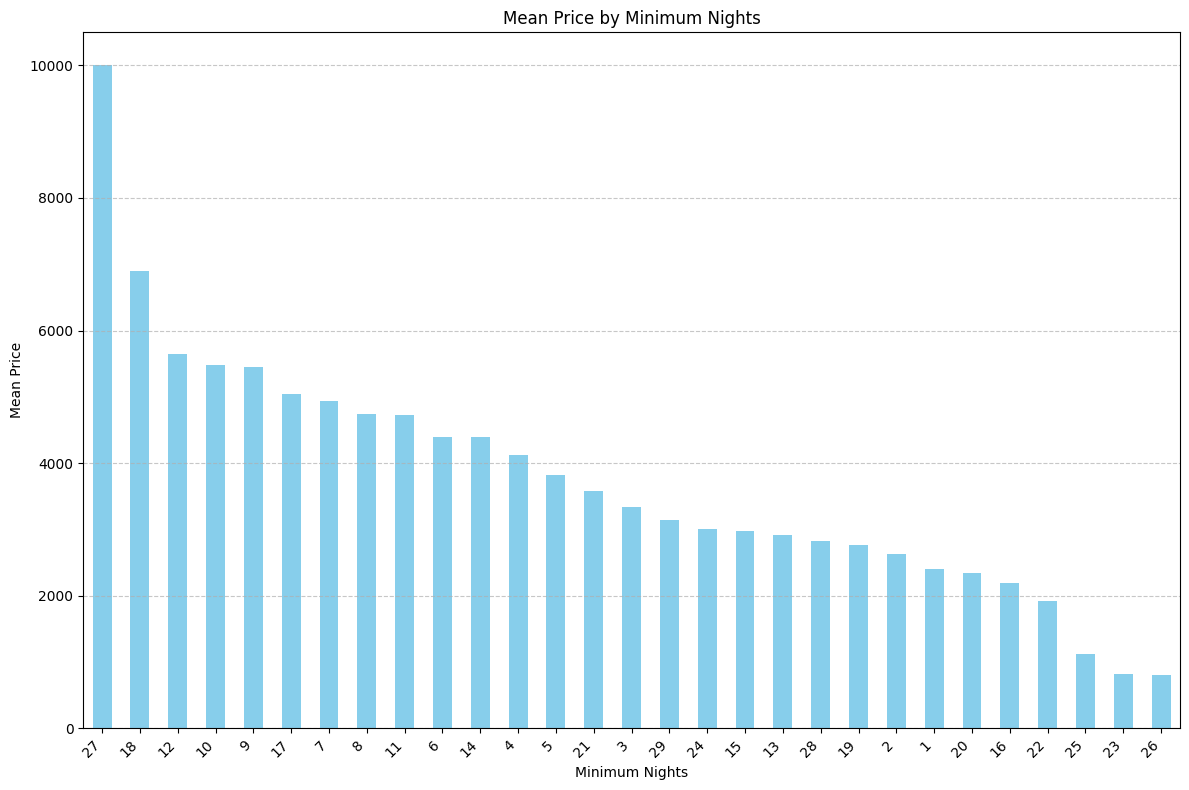

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the data
# Calculate the mean price for each neighbourhood
mean_price_by_minimum_nights = df.groupby('minimum_nights')['price'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
mean_price_by_minimum_nights.plot(kind='bar', color='skyblue')  # Plot the bar plot
plt.title('Mean Price by Minimum Nights')  # Add a title
plt.xlabel('Minimum Nights')  # Add label for x-axis
plt.ylabel('Mean Price')  # Add label for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

**Results of The Analysis**

The last code was used as a foundation for this code, analyzing carefully, we can see in the X axis the MInimum Nights and in the Y axis the Mean price, for the X axis we have a range between 1 to 29 but is not in sequence, in the graph we can see the price decreasing.

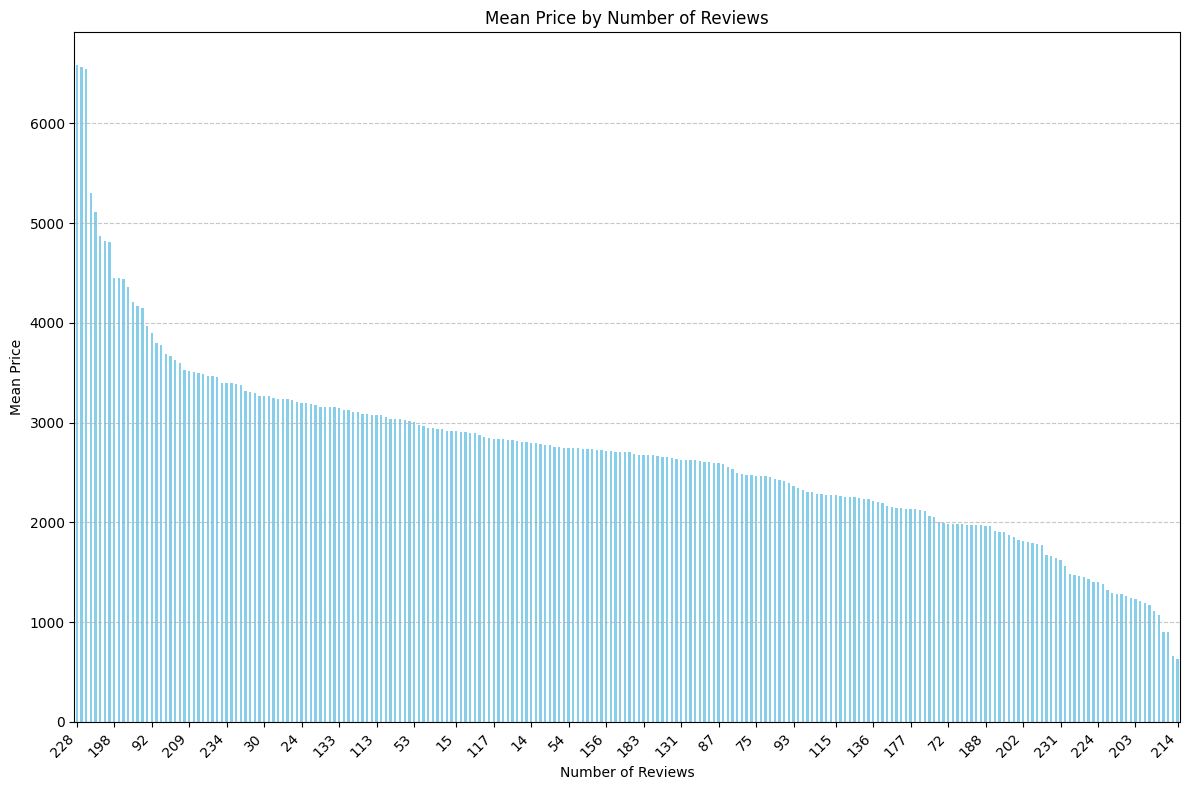

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with the data
# Calculate the mean price for each number of reviews
mean_price_by_number_of_reviews = df.groupby('number_of_reviews')['price'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
mean_price_by_number_of_reviews.plot(kind='bar', color='skyblue')  # Plot the bar plot
plt.title('Mean Price by Number of Reviews')  # Add a title
plt.xlabel('Number of Reviews')  # Add label for x-axis
plt.ylabel('Mean Price')  # Add label for y-axis

# Adjust x-ticks to avoid crowding while keeping original data points
# Limit the number of x-ticks displayed
tick_values = np.linspace(0, len(mean_price_by_number_of_reviews) - 1, min(30, len(mean_price_by_number_of_reviews)), dtype=int)  # Display around 30 labels, or fewer if there are not many unique values
plt.xticks(ticks=tick_values, labels=[mean_price_by_number_of_reviews.index[i] for i in tick_values], rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

**Results of The Analysis**

Related to the last code, here in the X axis we have the Number of Reviews, the Y axis we have the Mean Price, the highest number is
228 reviews in the mean price around the 6600, than, decreasing gradually.

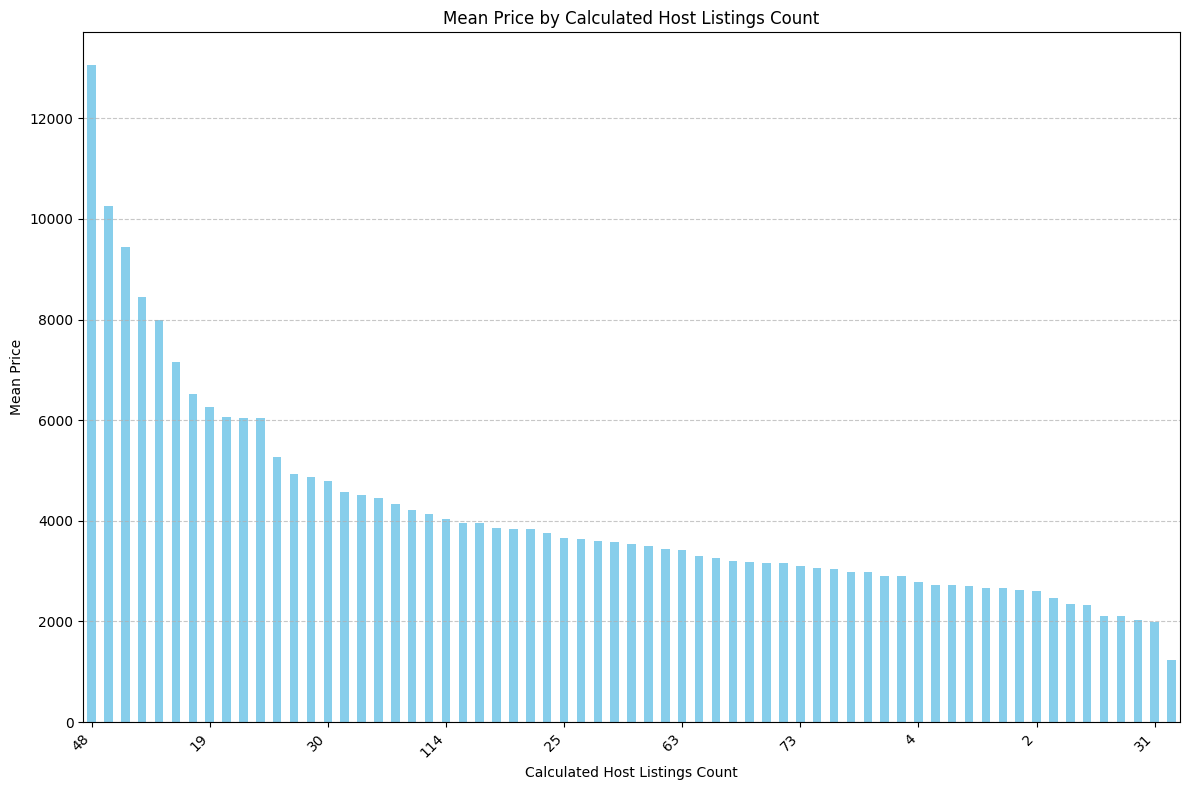

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with the data
# Calculate the mean price for each neighbourhood
mean_price_by_calculated_host_listings_count = df.groupby('calculated_host_listings_count')['price'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
ax = mean_price_by_calculated_host_listings_count.plot(kind='bar', color='skyblue')  # Create an axis object

# Set title and labels
plt.title('Mean Price by Calculated Host Listings Count')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Mean Price')

# Improve the readability of x-axis labels
total_labels = len(mean_price_by_calculated_host_listings_count)
step = total_labels // 10 + 1  # Show only every nth label, e.g., one label per 10 entries
labels = np.arange(total_labels)
ax.set_xticks(labels[::step])  # Set where ticks will appear
ax.set_xticklabels(mean_price_by_calculated_host_listings_count.index[::step], rotation=45, ha='right')  # Set custom labels

# Styling
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot


**Results of The Analysis**

For this graph, the code used was the same, but adapted to Calculated Host Listing Count with a little separation in the range for the x Axis, which shows the Calculated Host Listing Count, Y axis has the Mean Price. The bar is skewing to the left. But in the X axis we don't have a curved order, it is organanized y higher to lower prices.

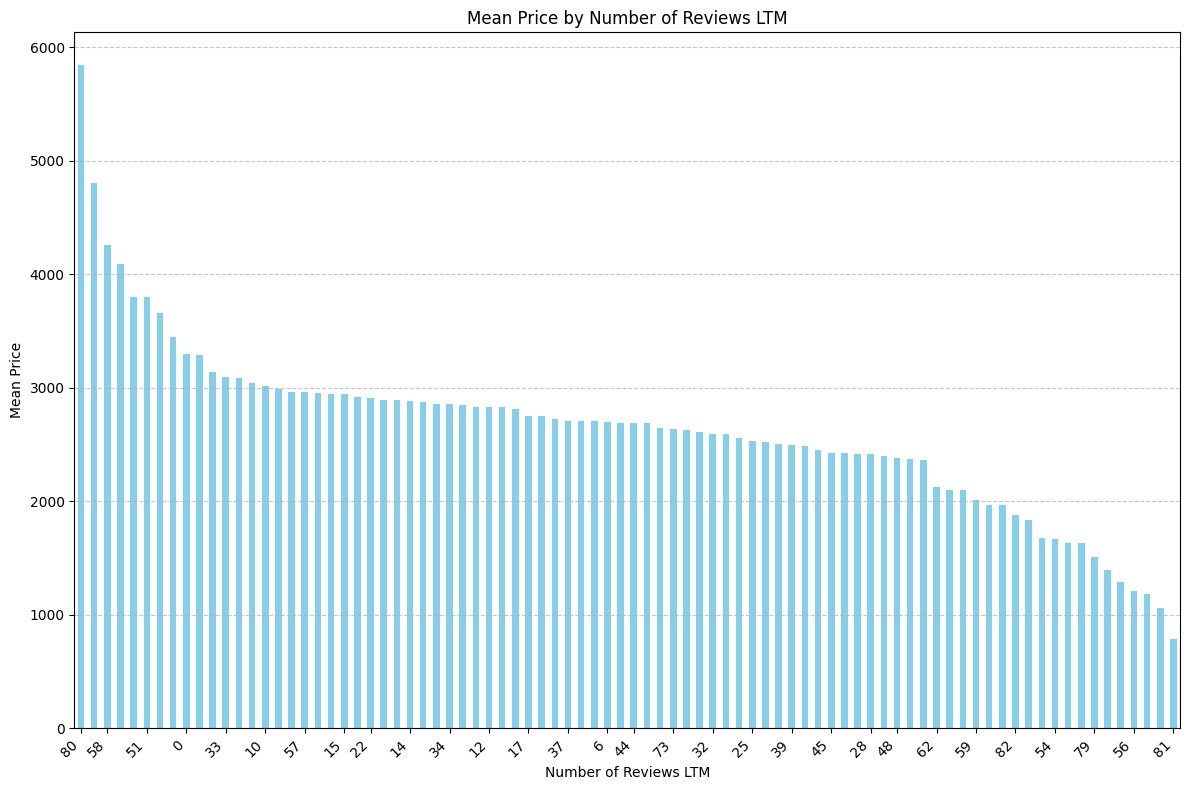

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with the data
# Calculate the mean price for each number of reviews last twelve months
mean_price_by_number_of_reviews_ltm = df.groupby('number_of_reviews_ltm')['price'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
mean_price_by_number_of_reviews_ltm.plot(kind='bar', color='skyblue')  # Plot the bar plot
plt.title('Mean Price by Number of Reviews LTM')  # Add a title
plt.xlabel('Number of Reviews LTM')  # Add label for x-axis
plt.ylabel('Mean Price')  # Add label for y-axis

# Adjust x-ticks to avoid crowding while keeping original data points
# Limit the number of x-ticks displayed
tick_values = np.linspace(0, len(mean_price_by_number_of_reviews_ltm) - 1, min(30, len(mean_price_by_number_of_reviews_ltm)), dtype=int)  # Display around 30 labels, or fewer if there are not many unique values
plt.xticks(ticks=tick_values, labels=[mean_price_by_number_of_reviews_ltm.index[i] for i in tick_values], rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot


**Results of The Analysis**

The code used was almost the same, but it was adapted to the Number of Reviews Last 12 Months, in the x Axis, and in the Y axis has the Mean Price. The bar is skewing to the left. But in the X axis we don't have a convex order, it is organized from higher to lower prices. We can see that it doesn't have a pattern, different numbers have different mean prices.

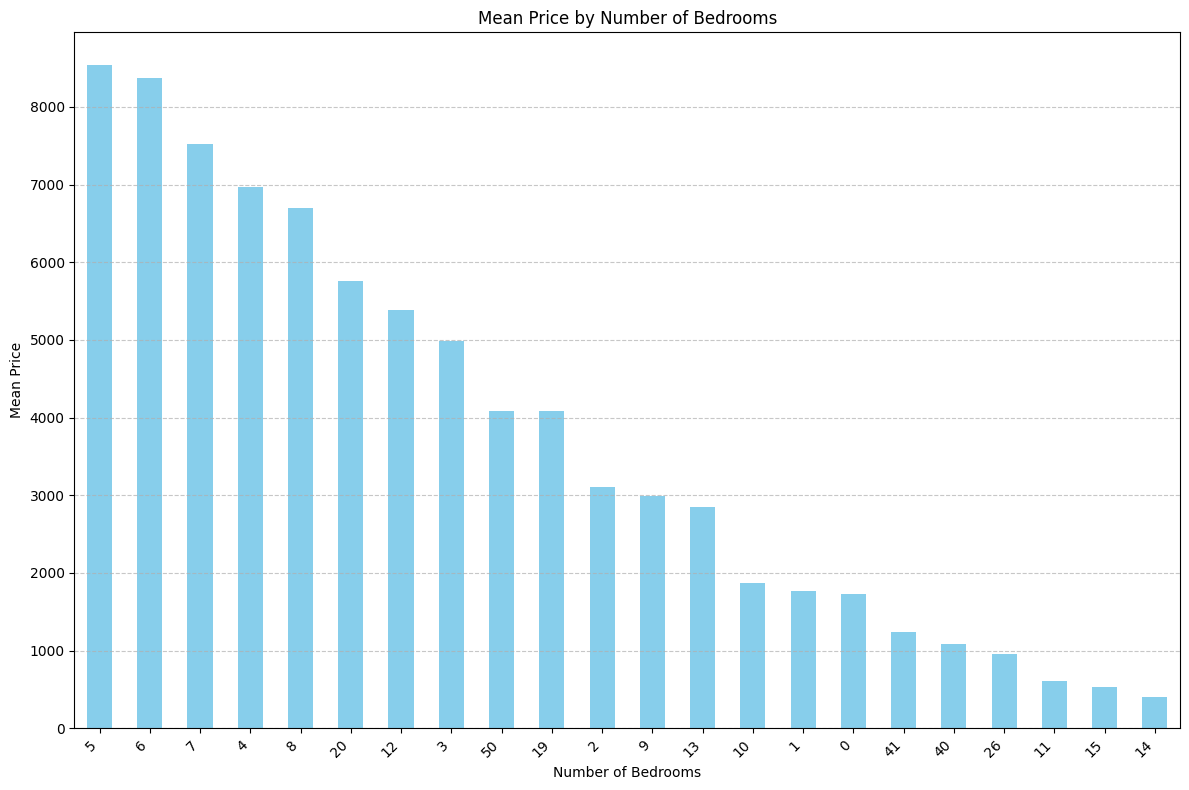

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the data
# Calculate the mean price for each number of bedrooms
mean_price_by_bedrooms = df.groupby('bedrooms')['price'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
mean_price_by_bedrooms.plot(kind='bar', color='skyblue')  # Plot the bar plot
plt.title('Mean Price by Number of Bedrooms')  # Add a title
plt.xlabel('Number of Bedrooms')  # Add label for x-axis
plt.ylabel('Mean Price')  # Add label for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot


**Results of The Analysis**

The code used was very close to the last one, but it was adapted to the Number of Bedrooms, in the x Axis, and in the Y axis has the Mean Price. The bar is skewing to the left. But in the X axis we don't have a the numbers growing in order, it is organized from higher to lower prices. We can see that it doesn't have a pattern, as well in the last bar plots, different numbers are related to different mean prices.

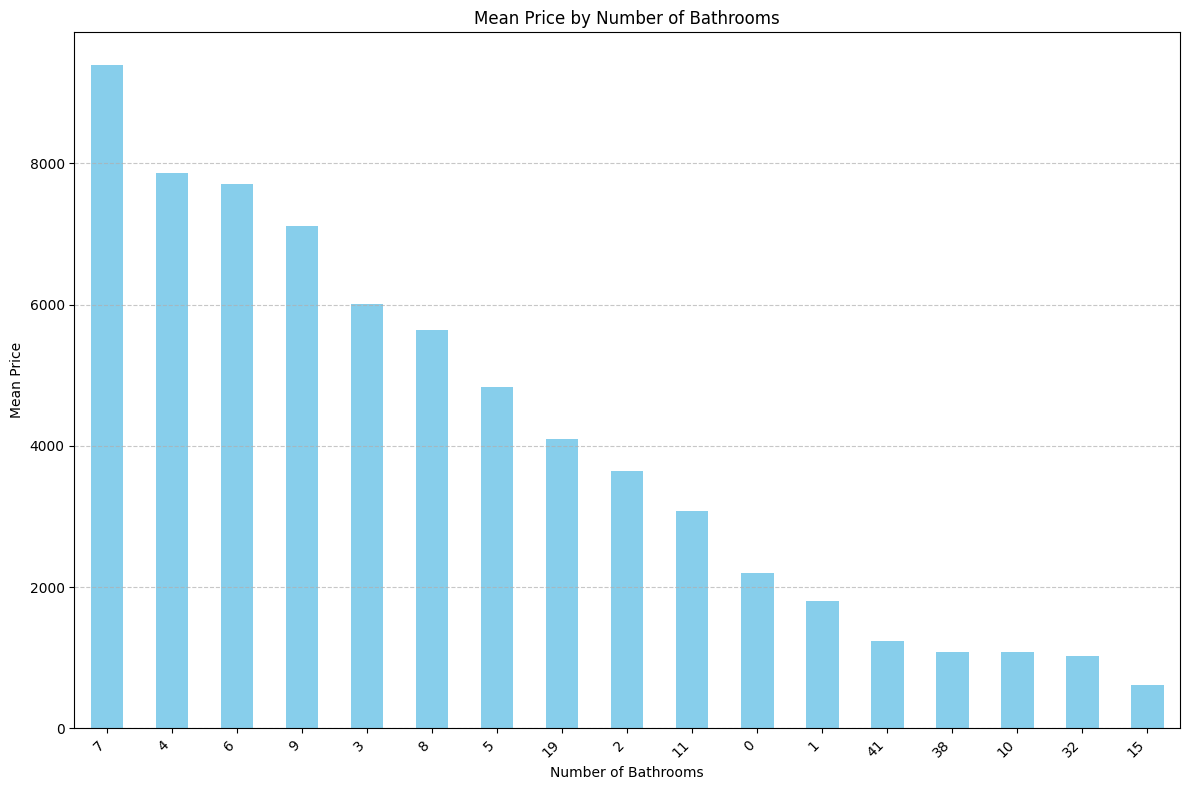

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the data
# Calculate the mean price for each number of bathrooms
mean_price_by_bathrooms = df.groupby('bathrooms')['price'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
mean_price_by_bathrooms.plot(kind='bar', color='skyblue')  # Plot the bar plot
plt.title('Mean Price by Number of Bathrooms')  # Add a title
plt.xlabel('Number of Bathrooms')  # Add label for x-axis
plt.ylabel('Mean Price')  # Add label for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot


**Results of The Analysis**

The code used was very close to the last one, but it was adapted to the Number of Bathrooms in the x Axis, and in the Y axis has the Mean Price. The bar is skewing to the left. But in the X axis we don't have a convex order, it is organized from higher to lower prices. We can see that has a little pattern, more than 10 nights the price tends to drop a little bit.

# Multivariate Analysis

##Correlation

In [ ]:
corrmat = df.corr(numeric_only=True)

# Print the correlation matrix
print(corrmat)

                                   price  minimum_nights  number_of_reviews  \
price                           1.000000        0.170893          -0.062171   
minimum_nights                  0.170893        1.000000          -0.102872   
number_of_reviews              -0.062171       -0.102872           1.000000   
calculated_host_listings_count  0.141086       -0.049726           0.000966   
availability_365               -0.018260       -0.093008          -0.001177   
number_of_reviews_ltm          -0.057924       -0.150685           0.689810   
bedrooms                        0.481535        0.212585          -0.110239   
bathrooms                       0.410742        0.153012          -0.096894   

                                calculated_host_listings_count  \
price                                                 0.141086   
minimum_nights                                       -0.049726   
number_of_reviews                                     0.000966   
calculated_host_listings

<Axes: >

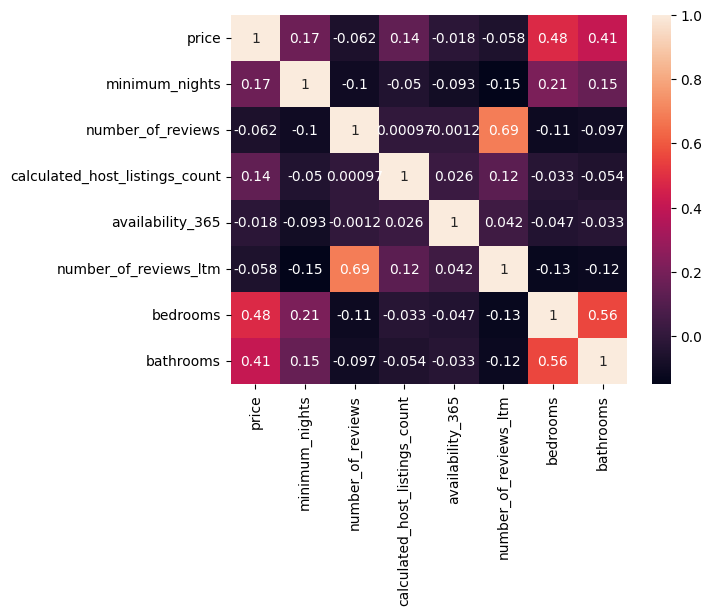

In [ ]:
sns.heatmap(corrmat, annot=True)

Correlation Matrix is a technique that we use to evaluate the relationship between two variables in a data set. Basically, inside of each cell, we have a correlation coefficient, where 1 is strong, 0 is neutral and -1 is not a strong relationship.


To start the interpretation of the correlation matrix, we see the lighter color is related to the strong side and the darker color is related to the weak side.


In the correlation matrix, we can see that the strongest relationship is price with bedrooms and bathrooms, which shows that most of people are looking for bedrooms and bathrooms when they are looking for an Airbnb. The rest of the correaltions are weak, with this we can conclude that external factors are having impact on our predict value, which is the price.


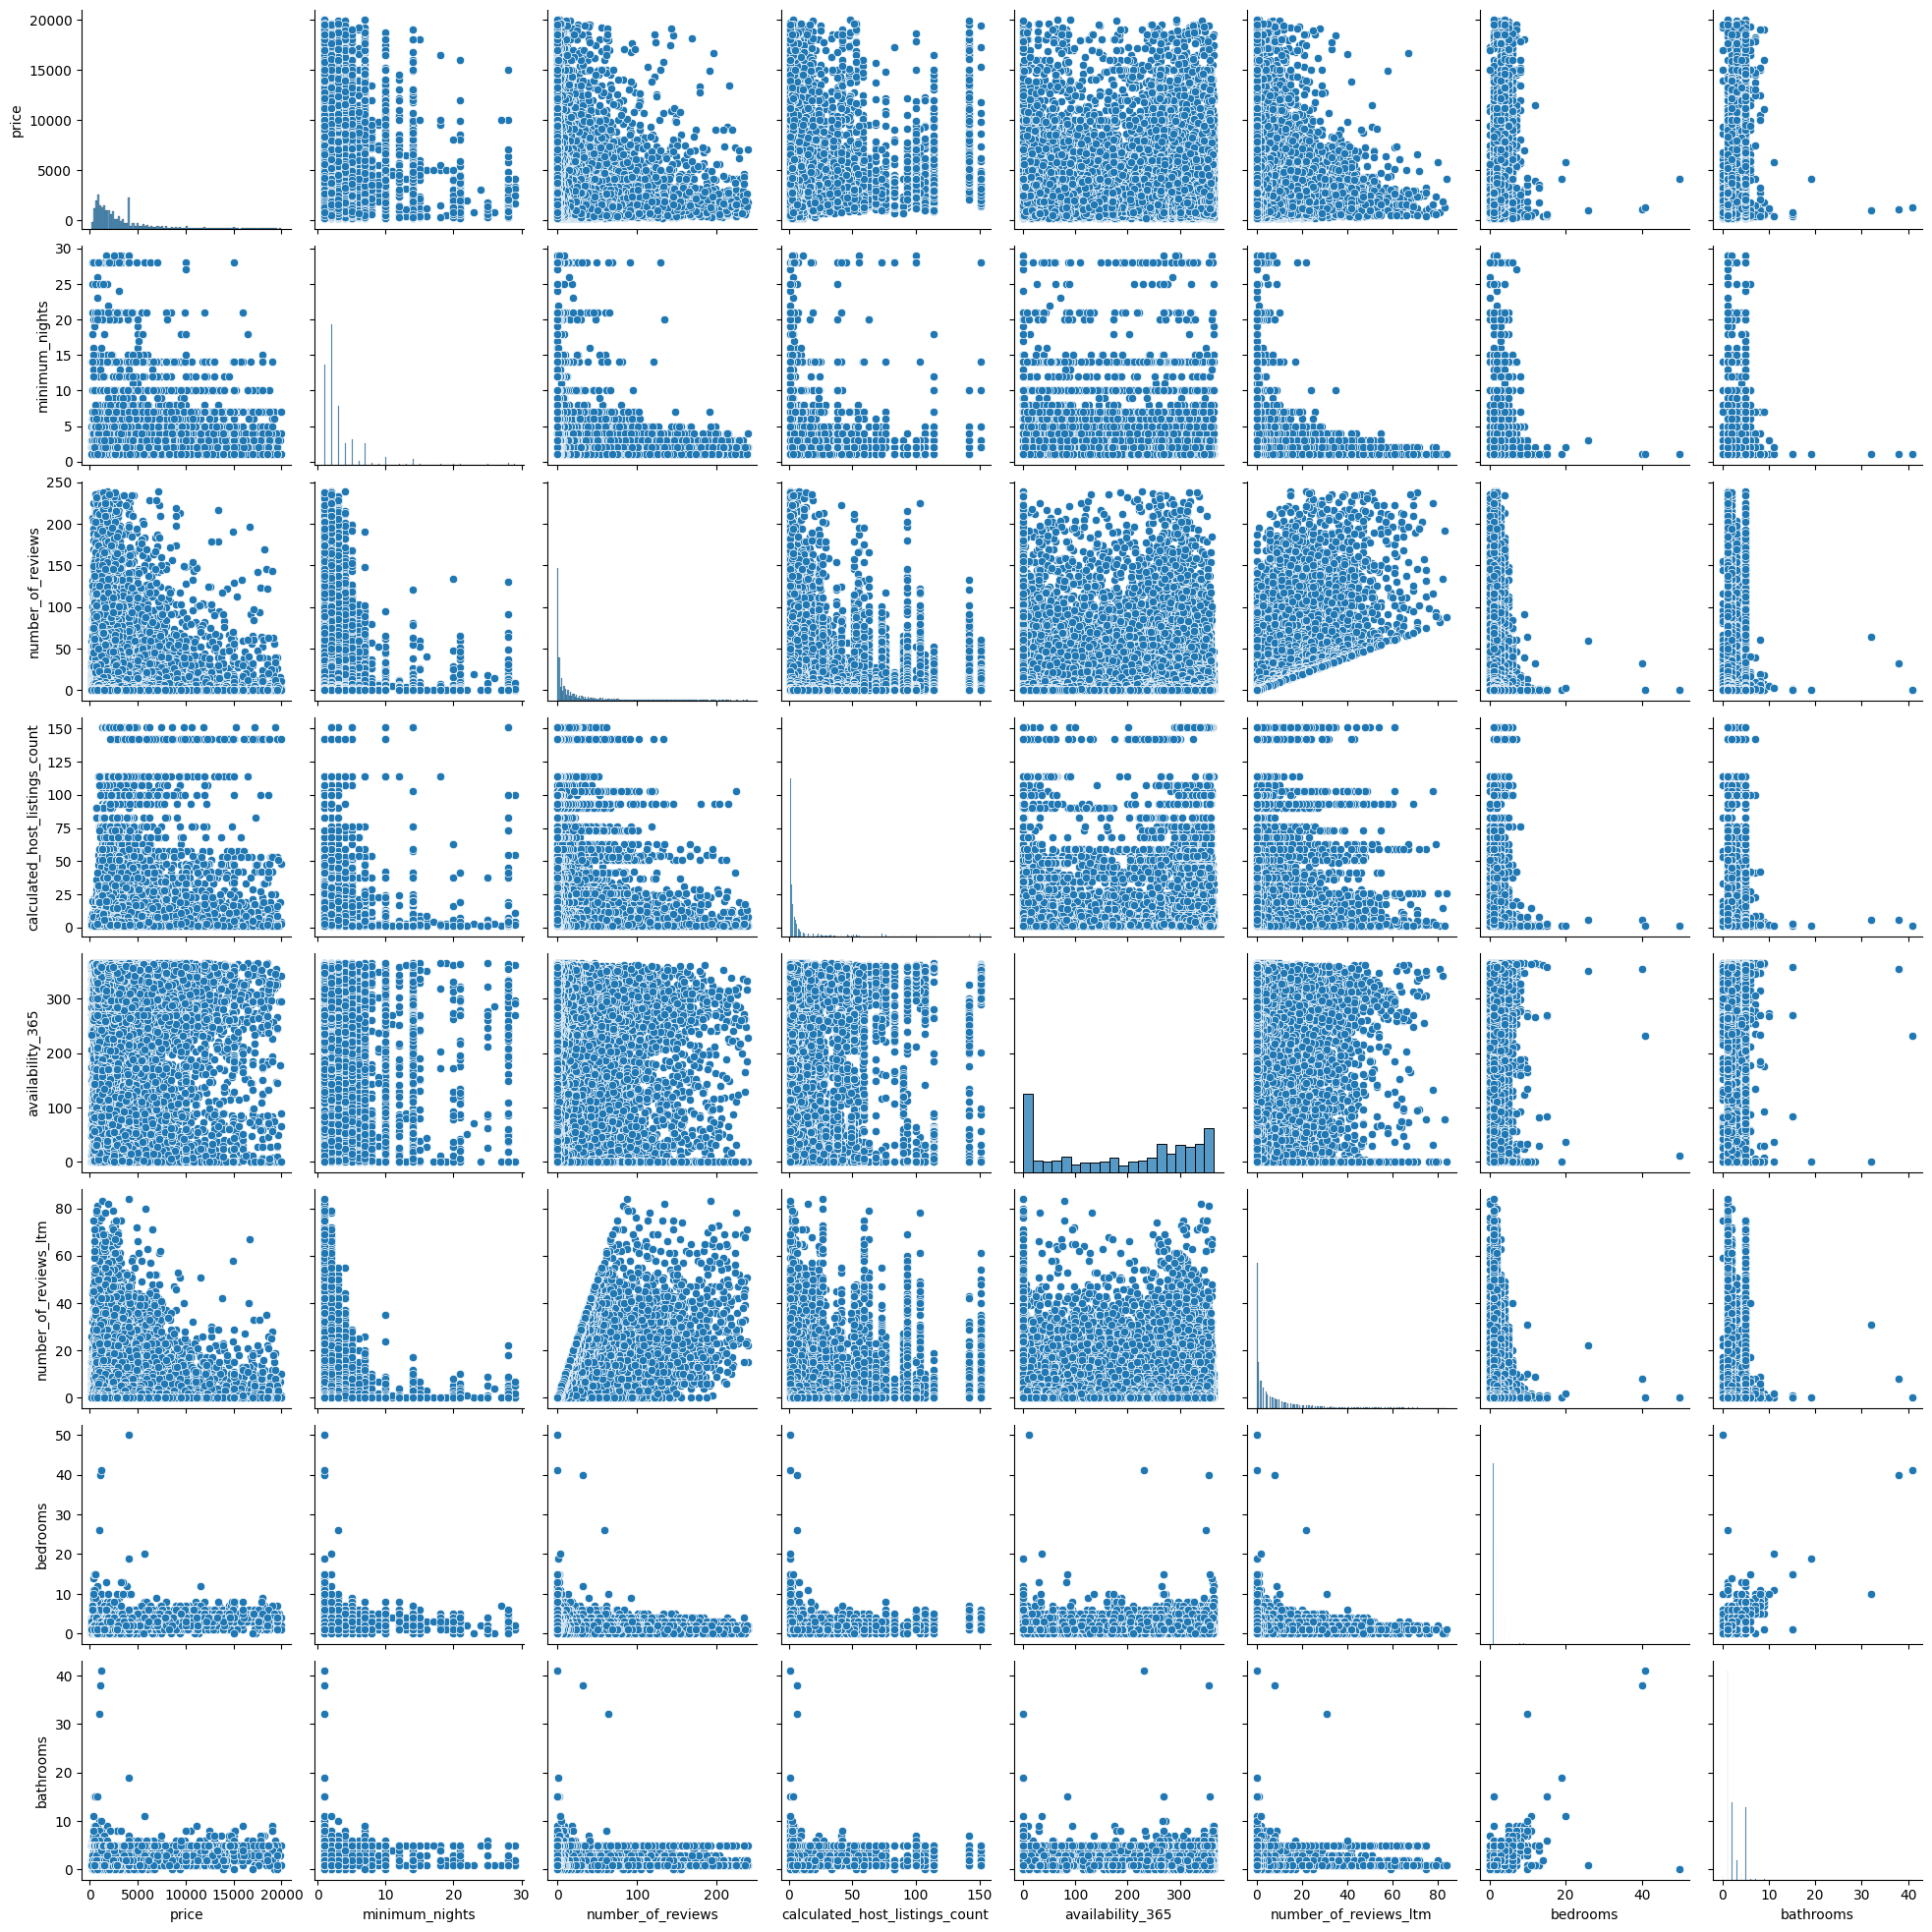

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame
sns.pairplot(df)


This graphs allow you to visualize relationships between pairs of variables and the distribution of each variable along the diagonal.

Correlation: In addition to scatterplots, the pair plot also displays the correlation coefficient between each pair of variables. This is indicated in the upper-right corner of each off-diagonal plot. The correlation coefficient ranges from -1 to 1, where:
1 indicates a perfect positive linear relationship,
-1 indicates a perfect negative linear relationship, and
0 indicates no linear relationship.

The pair plot is a powerful visualization tool that helps in identifying patterns, trends, and potential relationships between variables in your dataset. It's particularly useful for exploratory data analysis (EDA) and understanding the structure of your data before building predictive models.

## Scatterplots Price vs Minimum nights

The correlation between price and minimum nights is 0.17, which is low. The graphs between Price and Minimum nights show a low correlation

Hypothesis: The price is mostly affected by minimum nights
Correlation between minimum nights and price = 0.17 Analysis: When minimum nights increases, price increases ( direction is positive) Given the correlation analysis, we will reject this hypothesis
This correlation value is not that strong enouth to accept the hypothesis.

### Scatterplot Price vs Minimum nights, number of reviews

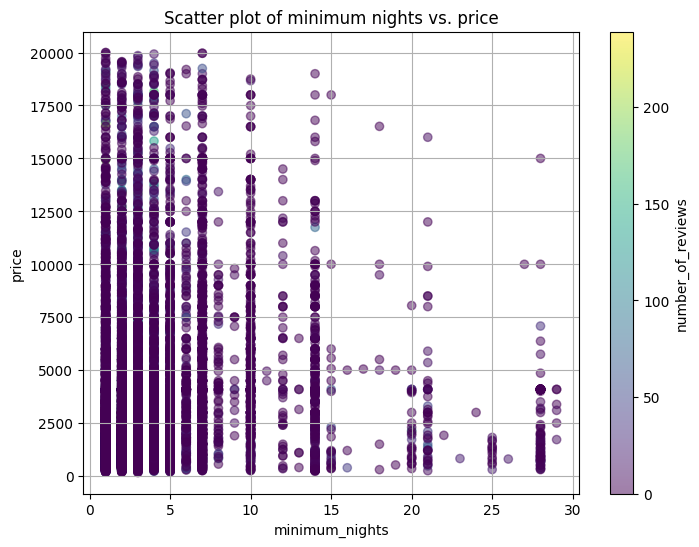

In [ ]:
import matplotlib.pyplot as plt

x = df['minimum_nights']
y = df['price']
colors = df['number_of_reviews']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)
plt.colorbar(label='number_of_reviews')
plt.title('Scatter plot of minimum nights vs. price')
plt.xlabel('minimum_nights')
plt.ylabel('price')
plt.grid(True)
plt.show()

- X axis as Minimum Nights

- Y axis is Price

- Z axis (color) - Number of Reviews

3 variables at a time

Overall, the scatter plot provides a visual representation of the relationship between 'minimum_nights' and 'price', with the color indicating the 'number_of_reviews'. It helps  identify any patterns or correlations between these variables. Mostly, the color of number_of_reviews are dark purple, close to 0

### Scatterplot Price vs Minimum nights, calculated host listing count

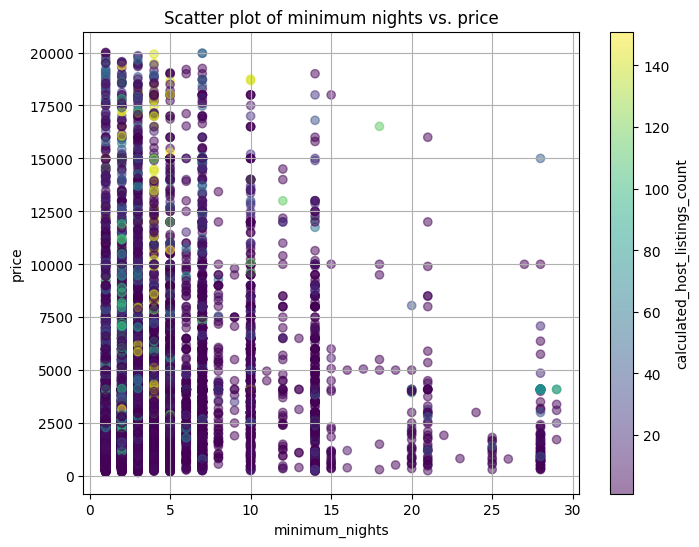

In [ ]:
import matplotlib.pyplot as plt

x = df['minimum_nights']
y = df['price']
colors = df['calculated_host_listings_count']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)
plt.colorbar(label='calculated_host_listings_count')
plt.title('Scatter plot of minimum nights vs. price')
plt.xlabel('minimum_nights')
plt.ylabel('price')
plt.grid(True)
plt.show()

- X axis as Minimum Nights

- Y axis is Price

- Z axis (color) - calculated host listings count

3 variables at a time

Overall, the scatter plot provides a visual representation of the relationship between 'minimum_nights' and 'price', with the color indicating the 'calculated_host_listings_count'. Additionally, the correlation between the variables can be calculated to understand the strength and direction of their relationship. Based on the graph, the colors based on the calculated_host_listings_count varries from 0 to 150.

### Scatterplot Price vs Minimum nights, number of reviews (ltm)

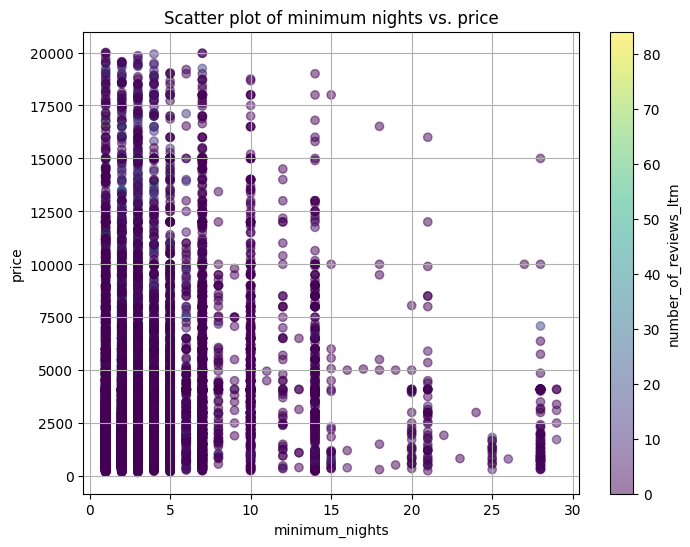

In [ ]:
import matplotlib.pyplot as plt

x = df['minimum_nights']
y = df['price']
colors = df['number_of_reviews_ltm']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)
plt.colorbar(label='number_of_reviews_ltm')
plt.title('Scatter plot of minimum nights vs. price')
plt.xlabel('minimum_nights')
plt.ylabel('price')
plt.grid(True)
plt.show()

- X axis as Minimum Nights

- Y axis is Price

- Z axis (color) - Number of Reviews (ltm)

3 variables at a time

Overall, the scatter plot provides a visual representation of the relationship between 'minimum_nights' and 'price', with the color indicating the 'number_of_reviews_ltm'. Mostly the number_of_reviews are close to 0, with no correlation.

### Scatterplot Price vs Minimum nights, availability 365

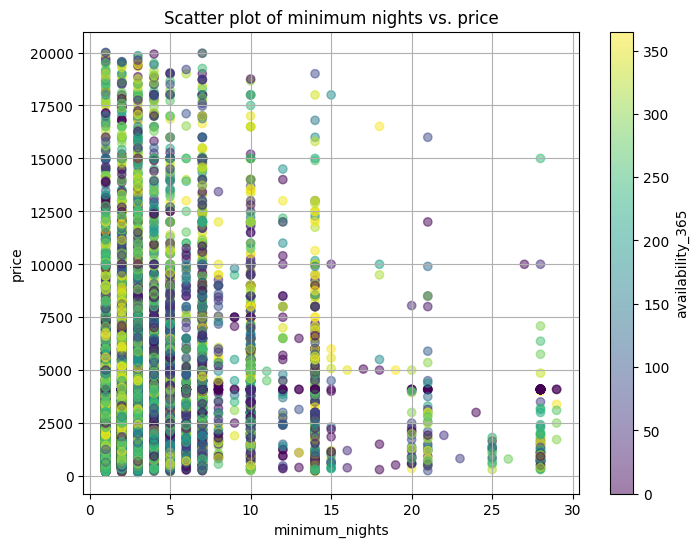

In [ ]:
import matplotlib.pyplot as plt

x = df['minimum_nights']
y = df['price']
colors = df['availability_365']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)
plt.colorbar(label='availability_365')
plt.title('Scatter plot of minimum nights vs. price')
plt.xlabel('minimum_nights')
plt.ylabel('price')
plt.grid(True)
plt.show()

- X axis as Minimum Nights

- Y axis is Price

- Z axis (color) - availability 365

3 variables at a time

Overall, the scatter plot provides a visual representation of the relationship between 'minimum_nights' and 'price', with the color indicating the 'availability_365'. Comparing to the previous graphs, availability_365 has a higher correlation.

### Scatterplot Price vs Minimum nights, bedrooms

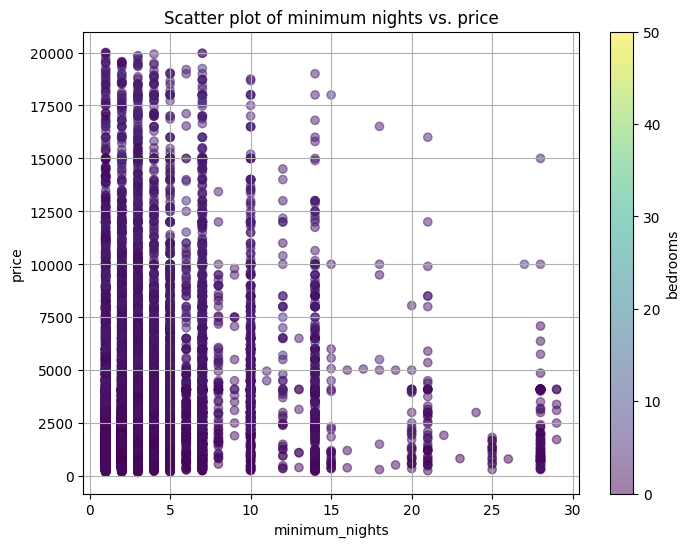

In [ ]:
import matplotlib.pyplot as plt

x = df['minimum_nights']
y = df['price']
colors = df['bedrooms']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)
plt.colorbar(label='bedrooms')
plt.title('Scatter plot of minimum nights vs. price')
plt.xlabel('minimum_nights')
plt.ylabel('price')
plt.grid(True)
plt.show()

- X axis as Minimum Nights

- Y axis is Price

- Z axis (color) - bedrooms

3 variables at a time

Overall, the scatter plot provides a visual representation of the relationship between 'minimum_nights' and 'price', with the color indicating the 'bedrooms'. The predominant color is purple, meaning that there is little to no correlation

### Scatterplot Price vs Minimum nights, bathrooms

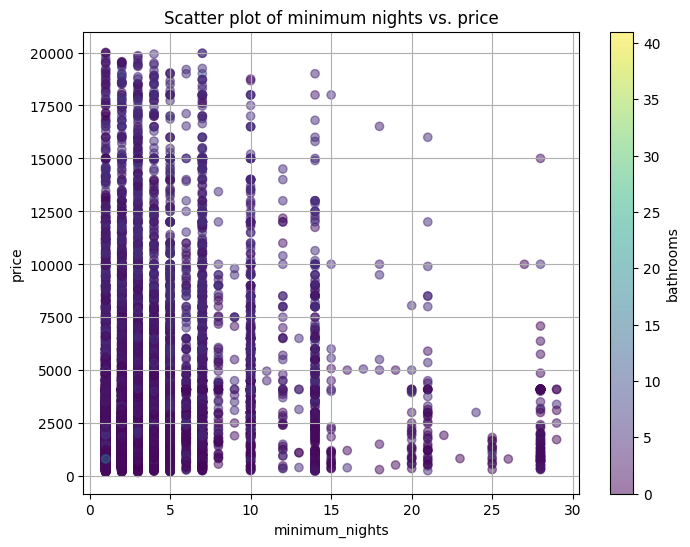

In [ ]:
import matplotlib.pyplot as plt

x = df['minimum_nights']
y = df['price']
colors = df['bathrooms']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)
plt.colorbar(label='bathrooms')
plt.title('Scatter plot of minimum nights vs. price')
plt.xlabel('minimum_nights')
plt.ylabel('price')
plt.grid(True)
plt.show()

- X axis as Minimum Nights

- Y axis is Price

- Z axis (color) - bathrooms

3 variables at a time

Overall, the scatter plot provides a visual representation of the relationship between 'minimum_nights' and 'price', with the color indicating the 'bedrooms'. The predominant color is purple, meaning that there is little to no correlation

##Scatterplots Price vs bedrooms

The correlation between Price and bedrooms is 0.48

Hypothesis: The price is mostly affected by the number of bedrooms
Correlation between minimum nights and price = 0.48

Analysis: When number of bedrooms increases, price increases ( direction is positive)

Given the correlation analysis, we will fail to reject this hypothesis This correlation value is strong enouth to accept the hypothesis.

### Scatterplot Price vs bedrooms, number of reviews

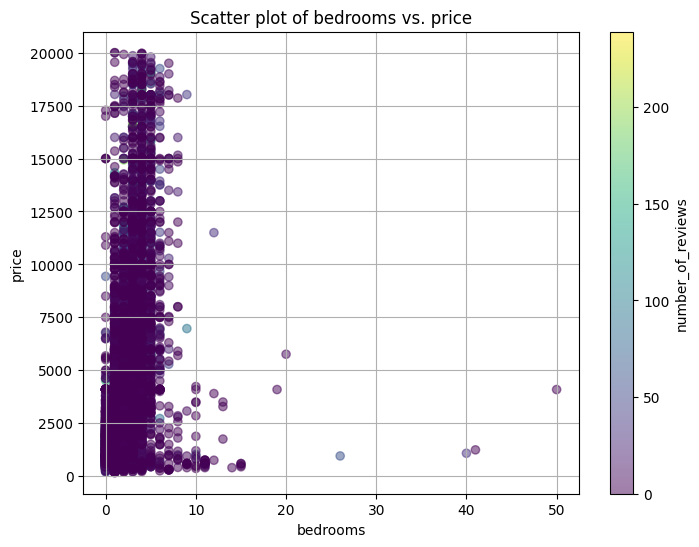

In [ ]:
import matplotlib.pyplot as plt

x = df['bedrooms']
y = df['price']
colors = df['number_of_reviews']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)
plt.colorbar(label='number_of_reviews')
plt.title('Scatter plot of bedrooms vs. price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.grid(True)
plt.show()

- X axis as bedrooms

- Y axis is Price

- Z axis (color) - Number of Reviews

3 variables at a time

Overall, the scatter plot provides a visual representation of the relationship between 'bedrooms' and 'price', with the color indicating the 'number_of_reviews'. The predominant color is purple, meaning that there is little to no correlation

###Scatterplot Price vs bedrooms, calculated host listing count

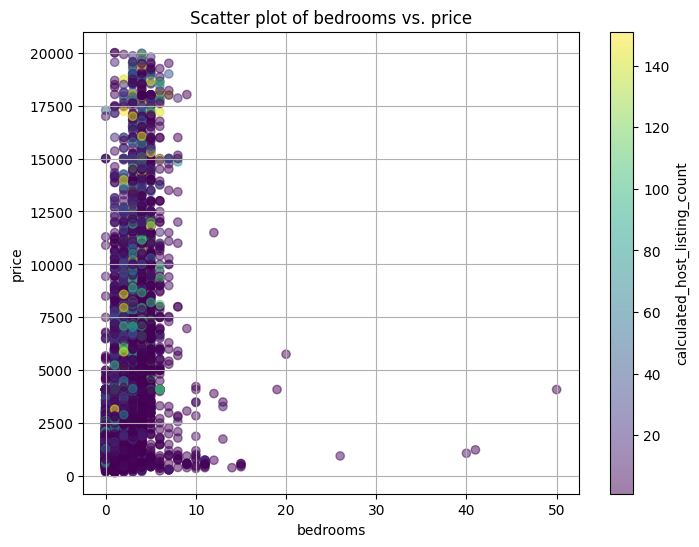

In [ ]:
import matplotlib.pyplot as plt

x = df['bedrooms']
y = df['price']
colors = df['calculated_host_listings_count']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)
plt.colorbar(label='calculated_host_listing_count')
plt.title('Scatter plot of bedrooms vs. price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.grid(True)
plt.show()

Overall, the scatter plot provides a visual representation of the relationship between 'bedrooms' and 'price', with the color indicating the 'calculated listing counts'. The predominant color is purple, but we see a variety of colors

###Scatterplot Price vs bedrooms, number of reviews (ltm)

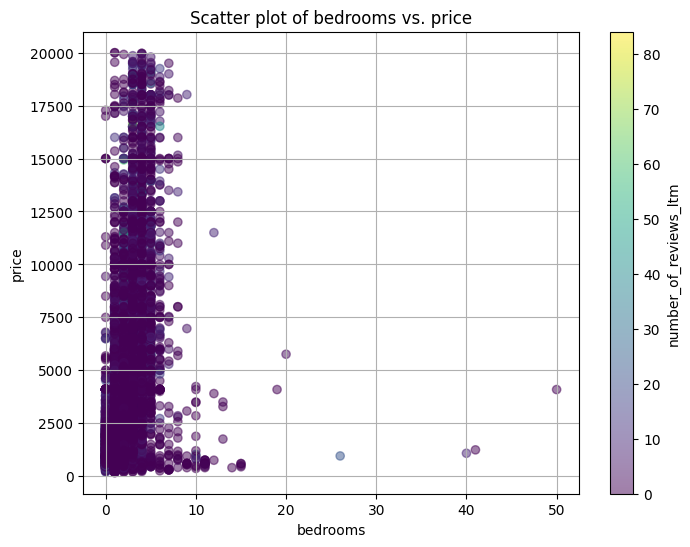

In [ ]:
import matplotlib.pyplot as plt

x = df['bedrooms']
y = df['price']
colors = df['number_of_reviews_ltm']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)
plt.colorbar(label='number_of_reviews_ltm')
plt.title('Scatter plot of bedrooms vs. price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.grid(True)
plt.show()

- X axis as bedrooms

- Y axis is Price

- Z axis (color) - Number of Reviews (ltm)

3 variables at a time

Overall, the scatter plot provides a visual representation of the relationship between 'bedrooms' and 'price', with the color indicating the 'number_of_reviews_ltm'. The predominant color is purple, meaning that there is little to no correlation

###Scatterplot Price vs bedrooms, availability 365

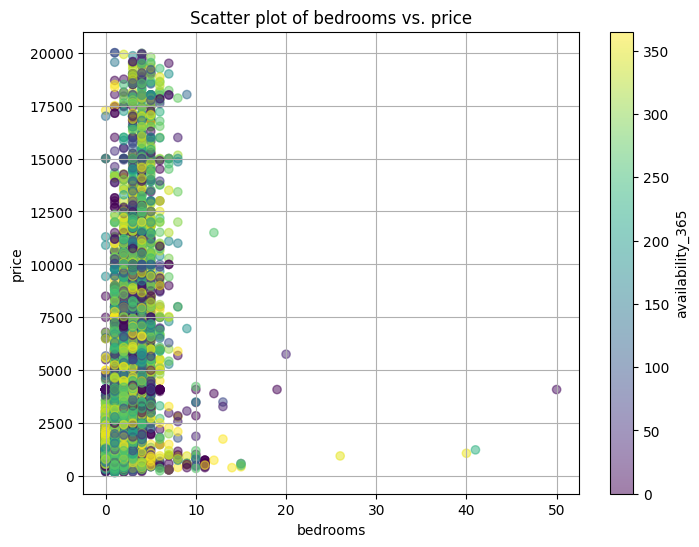

In [ ]:
import matplotlib.pyplot as plt

x = df['bedrooms']
y = df['price']
colors = df['availability_365']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)
plt.colorbar(label='availability_365')
plt.title('Scatter plot of bedrooms vs. price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.grid(True)
plt.show()

- X axis as bedrooms

- Y axis is Price

- Z axis (color) - availability 365

3 variables at a time

Overall, the scatter plot provides a visual representation of the relationship between 'bedrooms' and 'price', with the color indicating the 'availability_365'. The correlation ranges from 0 to 350

###Scatterplot Price vs bedrooms, bathrooms

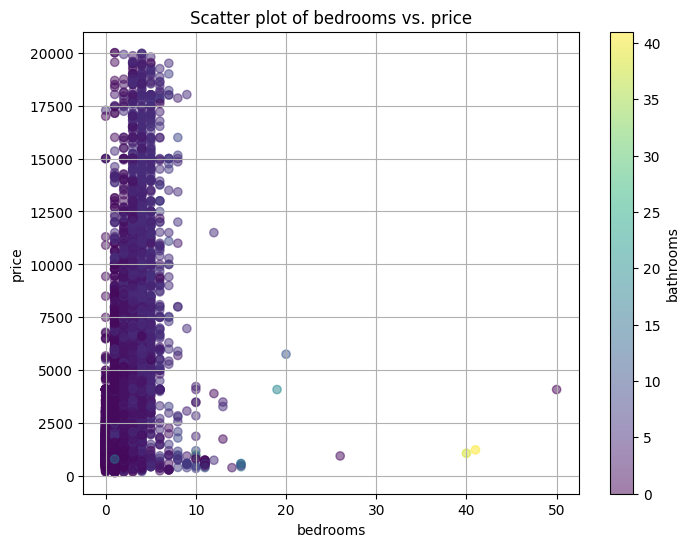

In [ ]:
import matplotlib.pyplot as plt

x = df['bedrooms']
y = df['price']
colors = df['bathrooms']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)
plt.colorbar(label='bathrooms')
plt.title('Scatter plot of bedrooms vs. price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.grid(True)
plt.show()

- X axis as bedrooms

- Y axis is Price

- Z axis (color) - bathrooms

3 variables at a time

Overall, the scatter plot provides a visual representation of the relationship between 'bedrooms' and 'price', with the color indicating the 'bathrooms'. The predominant color is purple, meaning that there is little to no correlation

###Scatterplot Price vs bedrooms, minimum price

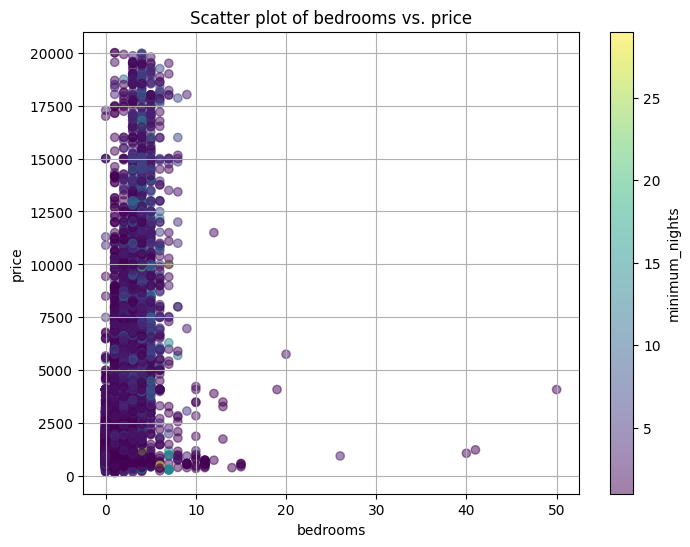

In [ ]:
import matplotlib.pyplot as plt

x = df['bedrooms']
y = df['price']
colors = df['minimum_nights']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)
plt.colorbar(label='minimum_nights')
plt.title('Scatter plot of bedrooms vs. price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.grid(True)
plt.show()

- X axis as bedrooms

- Y axis is Price

- Z axis (color) - minimum nights

3 variables at a time

Overall, the scatter plot provides a visual representation of the relationship between 'bedrooms' and 'price', with the color indicating the 'minimum nights'. The predominant color is purple, meaning that there is little to no correlation

# Modification

## Standardization

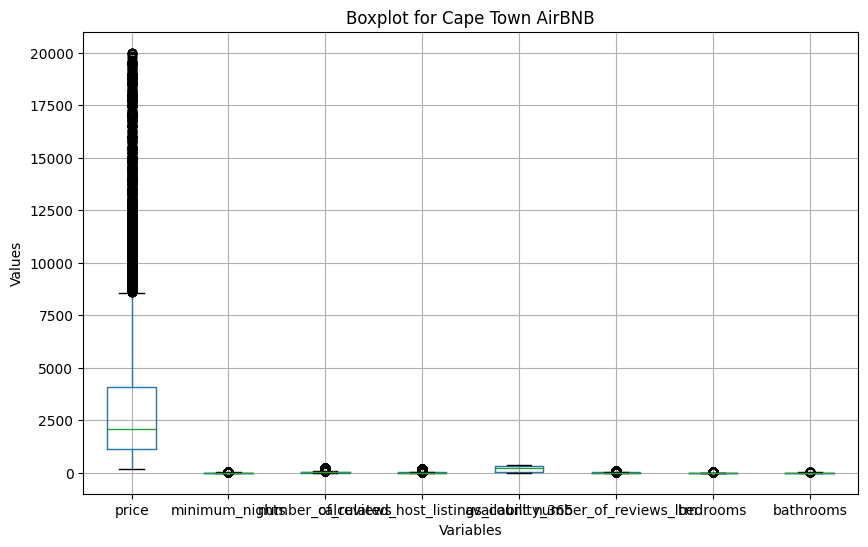

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame
plt.figure(figsize=(10, 6))  # Set figure size

# Create the boxplot
df.boxplot()

# Customize labels
plt.title('Boxplot for Cape Town AirBNB')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()


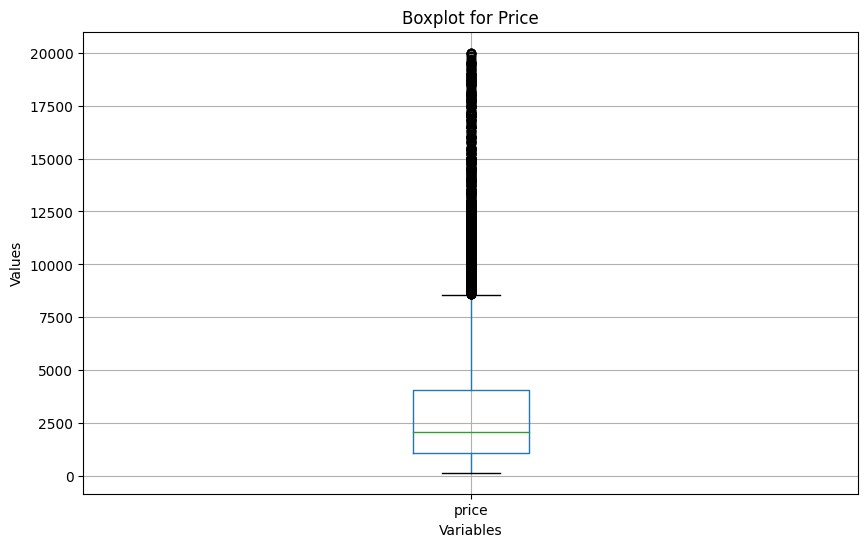

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame
plt.figure(figsize=(10, 6))  # Set figure size

# Create the boxplot
df.boxplot('price')

# Customize labels
plt.title('Boxplot for Price')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

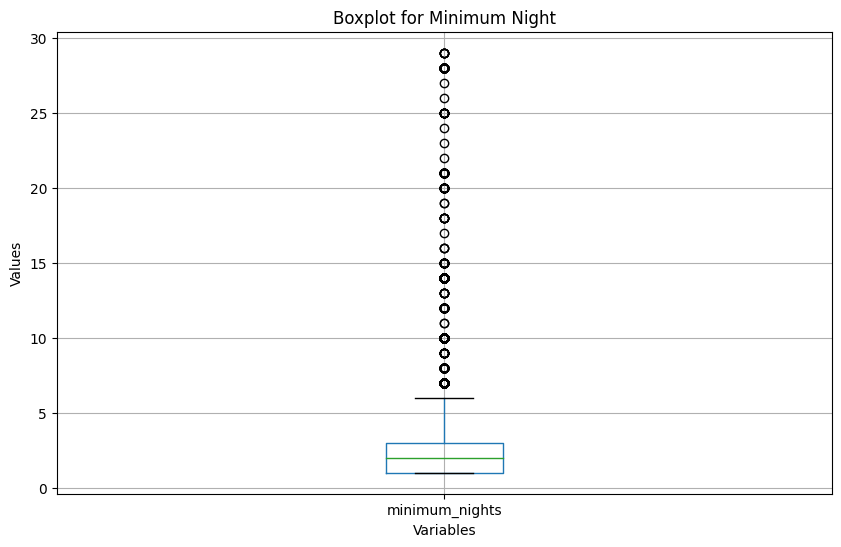

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame
plt.figure(figsize=(10, 6))  # Set figure size

# Create the boxplot
df.boxplot('minimum_nights')

# Customize labels
plt.title('Boxplot for Minimum Night')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

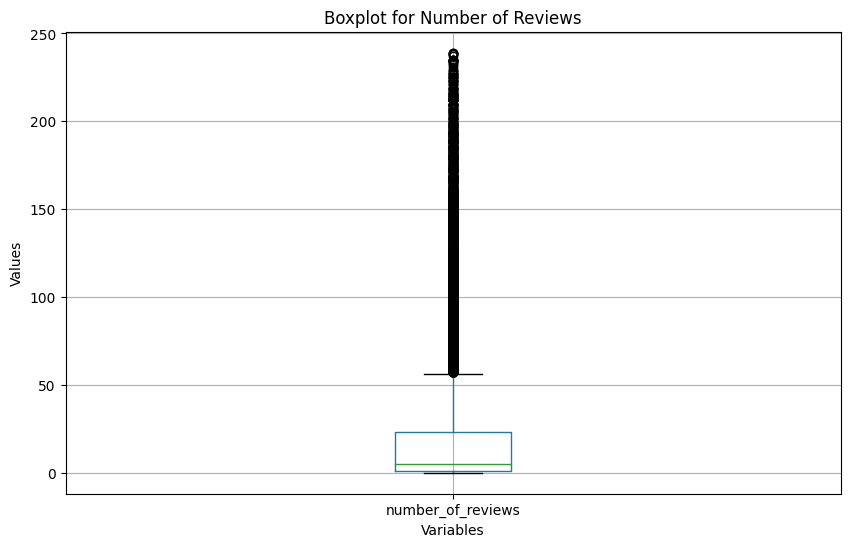

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame
plt.figure(figsize=(10, 6))  # Set figure size

# Create the boxplot
df.boxplot('number_of_reviews')

# Customize labels
plt.title('Boxplot for Number of Reviews')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

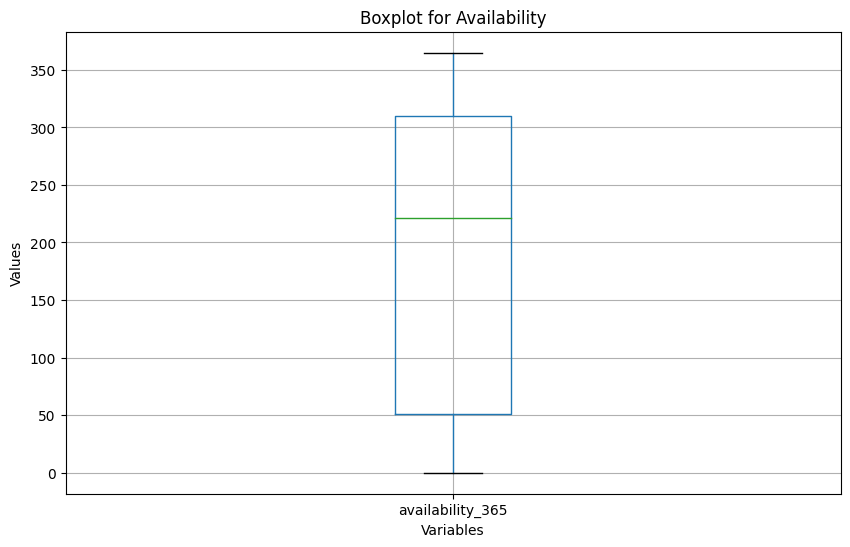

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame
plt.figure(figsize=(10, 6))  # Set figure size

# Create the boxplot
df.boxplot('availability_365')

# Customize labels
plt.title('Boxplot for Availability')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

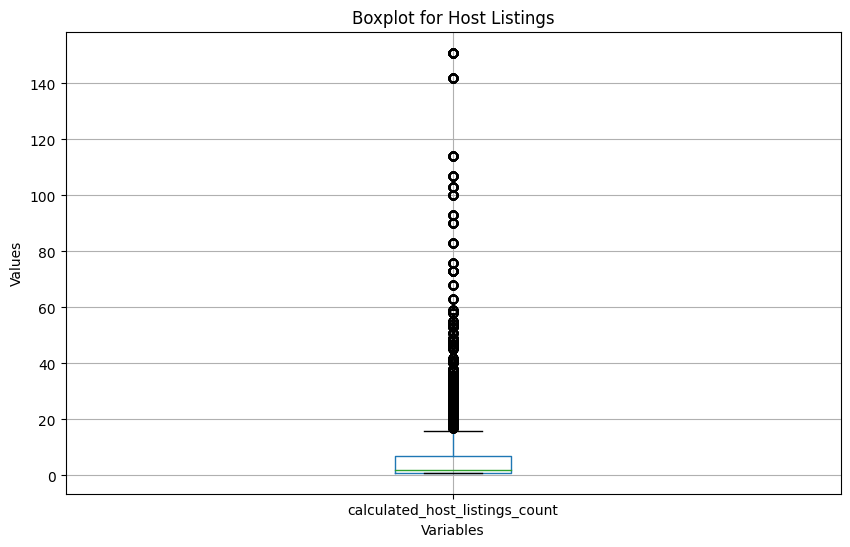

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame
plt.figure(figsize=(10, 6))  # Set figure size

# Create the boxplot
df.boxplot('calculated_host_listings_count')

# Customize labels
plt.title('Boxplot for Host Listings')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

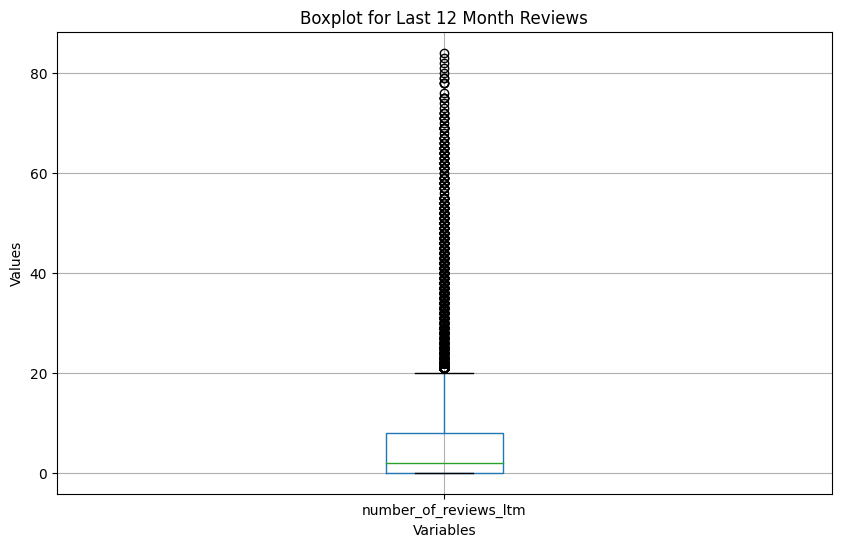

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame
plt.figure(figsize=(10, 6))  # Set figure size

# Create the boxplot
df.boxplot('number_of_reviews_ltm')

# Customize labels
plt.title('Boxplot for Last 12 Month Reviews')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

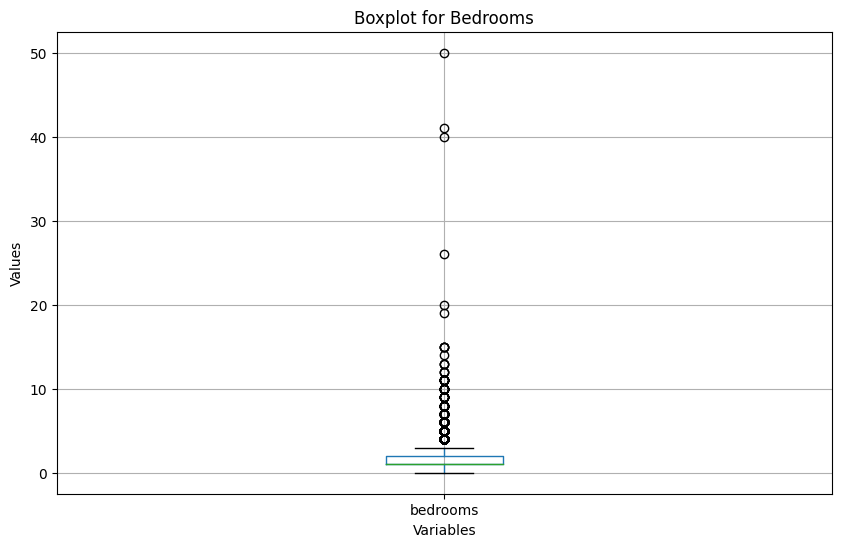

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame
plt.figure(figsize=(10, 6))  # Set figure size

# Create the boxplot
df.boxplot('bedrooms')

# Customize labels
plt.title('Boxplot for Bedrooms')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

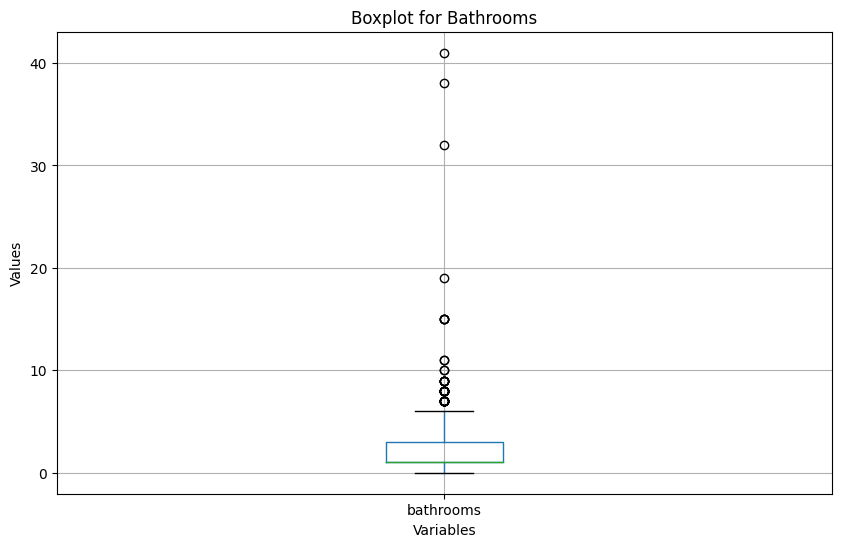

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame
plt.figure(figsize=(10, 6))  # Set figure size

# Create the boxplot
df.boxplot('bathrooms')

# Customize labels
plt.title('Boxplot for Bathrooms')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_df = scaler.fit_transform(df)

In [ ]:
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)

In [ ]:
scaled_df.head(10)

room_type     price  minimum_nights  number_of_reviews  \
0  -0.463736 -0.792452       -0.031323           1.544789   
1  -0.463736  0.310132       -0.344856           0.697537   
2  -0.463736 -0.351941        0.282209          -0.573342   
3   1.739591 -0.228924       -0.344856          -0.375650   
4  -0.463736 -0.188788        3.417535          -0.516858   
5  -0.463736 -0.351941       -0.344856          -0.262683   
6  -0.463736 -0.792452       -0.031323          -0.573342   
7  -0.463736 -0.587207       -0.344856          -0.149716   
8   1.739591 -0.648552        1.222807          -0.573342   
9  -0.463736 -0.776137       -0.344856           2.617975   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                       -0.430202          0.892930              -0.003016   
1                       -0.351592          0.801834              -0.003016   
2                       -0.312287          1.257311              -0.607565   
3                       -0.233676         -0.799925              -0.607565   
4                       -0.430202          1.340815              -0.607565   
5                       -0.351592         -1.430002              -0.607565   
6                       -0.430202         -1.430002              -0.607565   
7                       -0.351592         -0.617735              -0.506806   
8                       -0.430202         -1.430002              -0.607565   
9                       -0.272982          0.786652               1.609115   

   bedrooms  bathrooms  
0 -0.602139  -0.685477  
1  0.849786   0.538445  
2  0.849786  -0.073516  
3 -0.602139   1.762368  
4 -0.602139  -0.685477  
5  0.123823   1.762368  
6  0.123823  -0.685477  
7 -0.602139  -0.685477  
8 -0.602139  -0.073516  
9 -0.602139  -0.685477

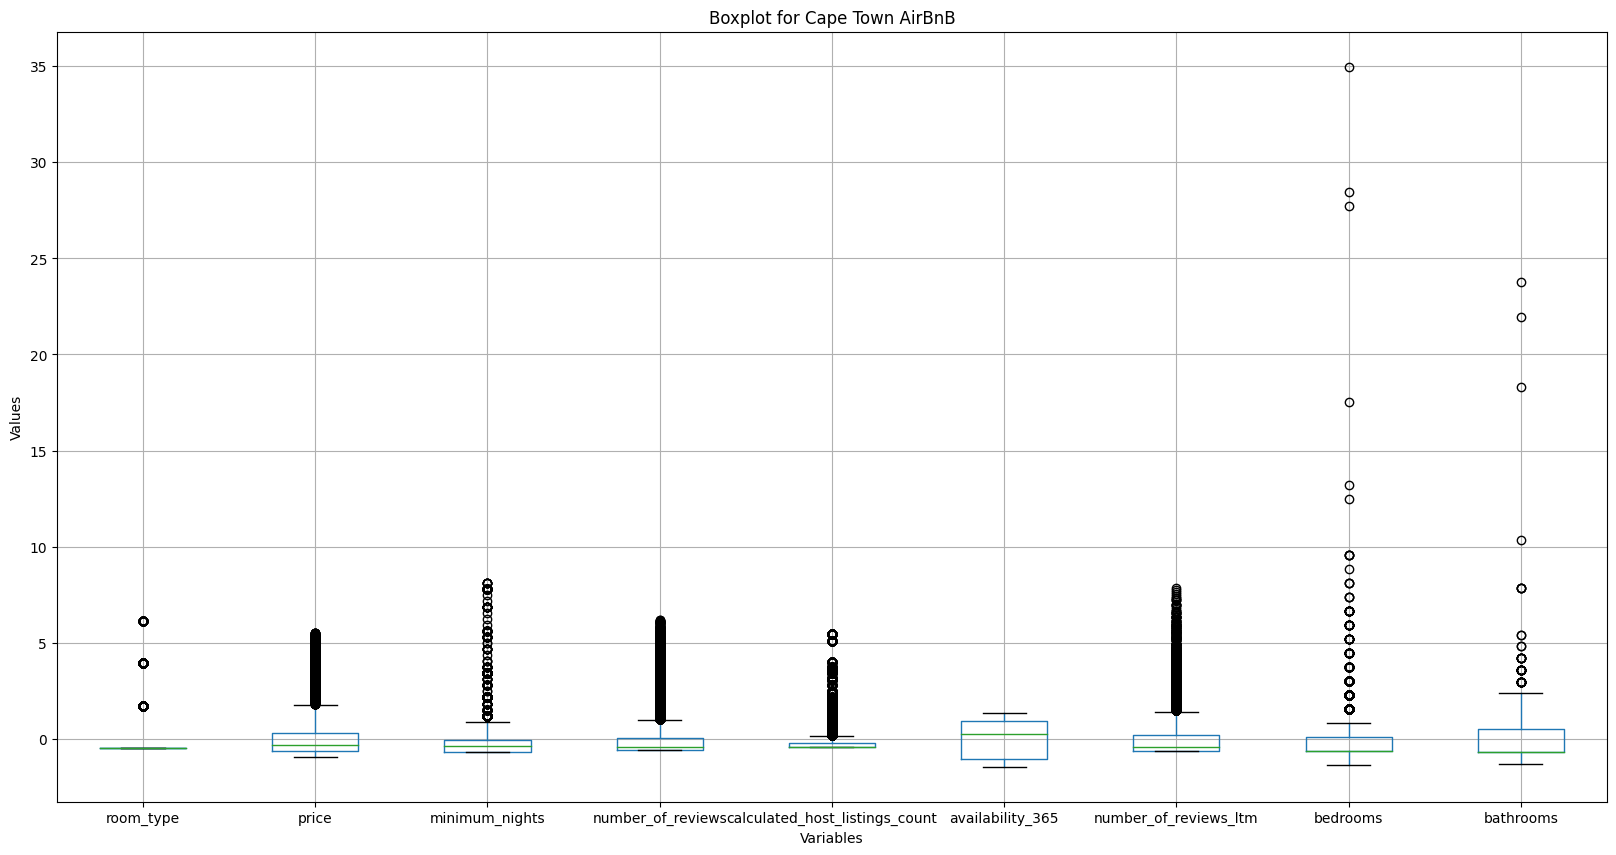

In [ ]:
import matplotlib.pyplot as plt

# Assuming california_df is your DataFrame
plt.figure(figsize=(20, 10))  # Set figure size

# Create the boxplot
scaled_df.boxplot()

# Customize labels
plt.title('Boxplot for Cape Town AirBnB')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

By identifying variables with a wide range of values or significant outliers, you can decide whether to transform or standardize these variables to improve the regression model. Additionally, visualizing the data distribution can help assess assumptions such as linearity and homoscedasticity in the model.
- For room_type the outliers in the dataset are 2, 4 and 6 thats because they do not fit within the model, there are outside the data, as well as it is a categorical varaible, which indicates that 0 which is entire house/apart is the most frequent within rentals in the Airbnb listings.
- The price starts from -2 and 2 which suggests there is a wide distrubution which indicates there prices that are significantly low, while others are tailored towards more blue-chip/luxury customers who are willing to pay more for convience.
- The minimum nights after standardzing are between -1 and 1 which suggest there are no extreme outliers, which assumes ther is normality and consistent variance across variables.
- The number of reviews are between -1 and 1 which suggest there are no extreme outliers and the number of reviews are fairly consistent in the responses from renters, there substantial amount of reviews to make informed decisions.
- For calculated host listings count it is between -1 and 0.5.The upper limit of 0.5 (half a standard deviation above the mean) might indicate that there are few hosts with a significantly higher number of listings.This is consistent with typical Airbnb data, where a minority of hosts control a large portion of the listings, which is seen by the outliers in the boxplot which indicate the minority.
- The avaliability within a year is between -2 and 2 this may suggest that most Airbnb listings have reasonable availability within the year and indicates that the data is not dominated by listings with extreme availability values.
- The number of reviews for the last 12 months are between -1 and 2 suggests majority of listings have a moderate number of reviews, while some listings stand out as receiving a higher number of reviews.
- Bedrooms is between -2 and 1 suggests that the Airbnb market primarily consists of smaller properties, with few listings having a high number of bedrooms.
- Bathrooms is between -2 and 3. The range extending to 3 standard deviations above the mean suggests there may be some listings with a higher-than-average number of bathrooms, which could be considered outliers.The range going down to -2 standard deviations below the mean suggests there may be some listings with significantly fewer bathrooms than the average, possibly even zero bathrooms.

# Modeling

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df.head(10)

room_type   price  minimum_nights  number_of_reviews  \
0          0   650.0               3                 75   
1          0  4029.0               2                 45   
2          0  2000.0               4                  0   
3          1  2377.0               2                  7   
4          0  2500.0              14                  2   
5          0  2000.0               2                 11   
6          0   650.0               3                  0   
9          0  1279.0               2                 15   
10         1  1091.0               7                  0   
11         0   700.0               2                113   

    calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                                1               306                      6   
1                                3               294                      6   
2                                4               354                      0   
3                                6                83                      0   
4                                1               365                      0   
5                                3                 0                      0   
6                                1                 0                      0   
9                                3               107                      1   
10                               1                 0                      0   
11                               5               292                     22   

    bedrooms  bathrooms  
0          1          1  
1          3          3  
2          3          2  
3          1          5  
4          1          1  
5          2          5  
6          2          1  
9          1          1  
10         1          2  
11         1          1

### Defining X

X variables are: room_type, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365, number_of_reviews_ltm, bedrooms, bathrooms

Y variable is price

In [ ]:
X = df.drop(['price'], axis = 1)

In [ ]:
y = df['price']

In [ ]:
X.head(10)

room_type  minimum_nights  number_of_reviews  \
0          0               3                 75   
1          0               2                 45   
2          0               4                  0   
3          1               2                  7   
4          0              14                  2   
5          0               2                 11   
6          0               3                  0   
9          0               2                 15   
10         1               7                  0   
11         0               2                113   

    calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                                1               306                      6   
1                                3               294                      6   
2                                4               354                      0   
3                                6                83                      0   
4                                1               365                      0   
5                                3                 0                      0   
6                                1                 0                      0   
9                                3               107                      1   
10                               1                 0                      0   
11                               5               292                     22   

    bedrooms  bathrooms  
0          1          1  
1          3          3  
2          3          2  
3          1          5  
4          1          1  
5          2          5  
6          2          1  
9          1          1  
10         1          2  
11         1          1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Regression Equation

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming 'df' is your DataFrame with 'X' as the predictor variable and 'y' as the target variable
X = df[['minimum_nights']]
y = df['price']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients
intercept = model.intercept_
coefficients = model.coef_

# Print the equation of the regression line
print(f"Regression Equation: y = {intercept} + {coefficients[0]} * X")

Regression Equation: y = 2569.5469540948325 + 164.20434464710416 * X


##Model 1

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.intercept_

684.0479920085813

In [ ]:
model.coef_

array([-9.00340694e+02,  5.27221319e+01, -5.78176404e-02,  1.88184146e+01,
        3.08008183e-01, -7.40865056e+00,  7.28171223e+02,  4.09506253e+02])

f(x) = (-9.00340694e+02room_type + 5.27221319e+01minimum nights + -5.78176404e-02number_of_reviews + 1.88184146e+01calculated_host_listings_count + 3.08008183e-01availability_365 + -7.40865056e+00number_of_reviews_ltm + 7.28171223e+02bedrooms + 4.09506253e+02bathrooms) + 684.0479

Positive - 5.2722, 1.8818, 3.0800, 7.2817, 4.0950

minimum nights, calculated_host_listings_count, availability_365, bedrooms, bathrooms

Negative - -9.0034, -5.7817, -7.4086

Room_type, Number of Reviews, Number of reviews(ltm)

 Split up data

 X = everything except price

 y = only price Based on rows:

 Training data - 80% of rows - 18400

 Testing data - 20% of the remaining - 4600


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
X_test['Predicted Price'] = y_pred

In [ ]:
X_test['Actual Price'] = y_test

In [ ]:
X_test.head(10)

room_type  minimum_nights  number_of_reviews  \
4801          0               2                 23   
22095         0               3                  3   
19092         0               4                  5   
11067         0               2                 28   
3442          0               2                  5   
21396         0               5                  1   
22792         0               1                  1   
10895         0               2                  1   
8164          1               1                 24   
15489         0               2                 17   

       calculated_host_listings_count  availability_365  \
4801                                1               181   
22095                               1               168   
19092                               1               228   
11067                             103               319   
3442                                1                 0   
21396                               1               124   
22792                               3               265   
10895                               1                 0   
8164                                1               262   
15489                              15               335   

       number_of_reviews_ltm  bedrooms  bathrooms  Predicted Price  \
4801                       3         1          5      3616.206884   
22095                      3         3          5      5122.423708   
19092                      5         2          1      2812.497159   
11067                      4         0          1      3204.296327   
3442                       0         2          2      3083.376535   
21396                      1         3          2      4000.729789   
22792                      1         1          1      2005.058545   
10895                      0         0          1      1217.759106   
8164                       9         1          1      1005.557987   
15489                     16         0          1      1464.936161   

       Actual Price  
4801     925.000000  
22095   4671.000000  
19092   1125.000000  
11067   1549.000000  
3442    1464.000000  
21396   2664.000000  
22792   1100.000000  
10895   4089.188143  
8164     829.000000  
15489   6486.000000

In [ ]:
print(X_test['Predicted Price'].mean())
print(X_test['Actual Price'].mean())

3064.708926016755
2981.055833007087


In [ ]:
print(X_test['Predicted Price'].median())
print(X_test['Actual Price'].median())

2762.19173544212
2003.0


In [ ]:
print(X_test['Predicted Price'].mode()[0])
print(X_test['Actual Price'].mode()[0])

992.9253210577054
4089.1881431352554


<Axes: >

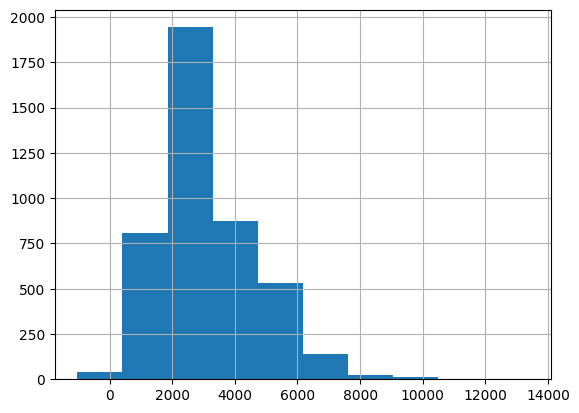

In [ ]:
X_test['Predicted Price'].hist()

<Axes: >

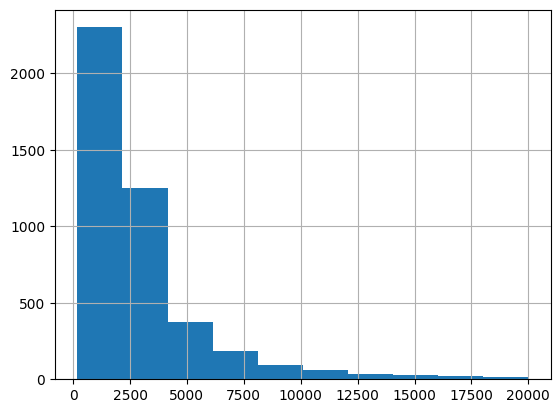

In [ ]:
X_test['Actual Price'].hist()

### Residuals

In [ ]:
X_test['Residuals'] = X_test['Actual Price'] - X_test['Predicted Price']

In [ ]:
X_test.head(10)

room_type  minimum_nights  number_of_reviews  \
4801          0               2                 23   
22095         0               3                  3   
19092         0               4                  5   
11067         0               2                 28   
3442          0               2                  5   
21396         0               5                  1   
22792         0               1                  1   
10895         0               2                  1   
8164          1               1                 24   
15489         0               2                 17   

       calculated_host_listings_count  availability_365  \
4801                                1               181   
22095                               1               168   
19092                               1               228   
11067                             103               319   
3442                                1                 0   
21396                               1               124   
22792                               3               265   
10895                               1                 0   
8164                                1               262   
15489                              15               335   

       number_of_reviews_ltm  bedrooms  bathrooms  Predicted Price  \
4801                       3         1          5      3616.206884   
22095                      3         3          5      5122.423708   
19092                      5         2          1      2812.497159   
11067                      4         0          1      3204.296327   
3442                       0         2          2      3083.376535   
21396                      1         3          2      4000.729789   
22792                      1         1          1      2005.058545   
10895                      0         0          1      1217.759106   
8164                       9         1          1      1005.557987   
15489                     16         0          1      1464.936161   

       Actual Price    Residuals  
4801     925.000000 -2691.206884  
22095   4671.000000  -451.423708  
19092   1125.000000 -1687.497159  
11067   1549.000000 -1655.296327  
3442    1464.000000 -1619.376535  
21396   2664.000000 -1336.729789  
22792   1100.000000  -905.058545  
10895   4089.188143  2871.429037  
8164     829.000000  -176.557987  
15489   6486.000000  5021.063839

In [ ]:
print(X_test['Residuals'].mean())
print(X_test['Residuals'].median())
print(X_test['Residuals'].mode()[0])
print(X_test['Residuals'].max())
print(X_test['Residuals'].min())

-83.6530930096679
-570.9434914053454
-545.6474529844377
18940.832748514033
-12866.122037390436


<Axes: >

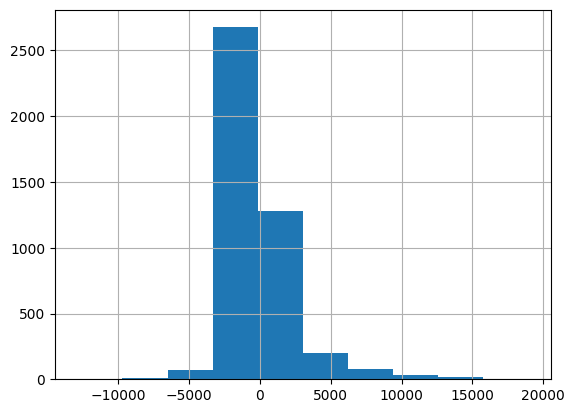

In [ ]:
X_test['Residuals'].hist()

The difference between actual val and predicted val on average the residual is -83.6530, which is bad as the error is high The median is -570.9434, which means that the plot is shifted to the left

###MSE

In [ ]:
mse = mean_squared_error(y_test, y_pred)
#y_test is actual y values
#y_pred is predicted y values
print(mse)

5932037.258939109


The error is high, meaning that the model is bad

###R2

In [ ]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.31790611777720523


This model has 31% goodness of fit and variability.
It is closer to 0, which is bad.

###RMSE

In [ ]:
import numpy as np

rmse = np.sqrt(mse)
print(rmse)

2435.577397443799


The number is further from 0, meaning that it is a bad model.

### Scaling

Making all the variables come to the same scale.

<Axes: >

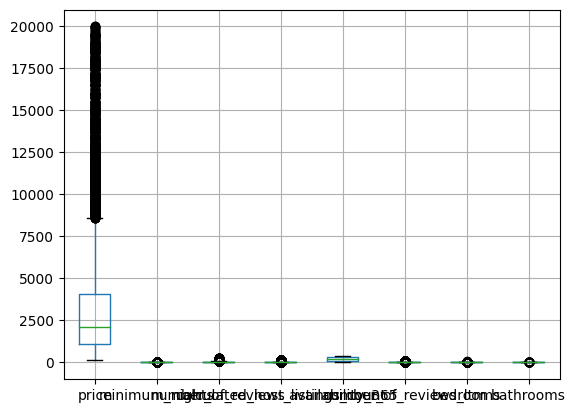

In [ ]:
df.boxplot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

<Axes: >

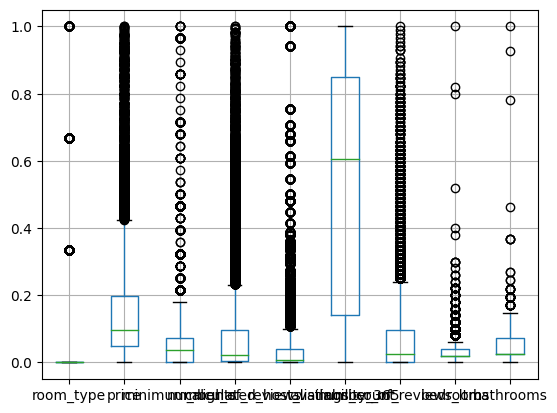

In [ ]:
df_scaled.boxplot()

After scaling the model all the variables have the same scale.

Min-Max Scaling: This technique scales the features to a fixed range, usually between 0 and 1. It subtracts the minimum value of each feature and divides by the range (the maximum value minus the minimum value).

- For price the box plot shows the spread of the data through the interquartile range (IQR), which is the range between 0.05 and 0.2
- For availability_365 the box plot shows the spread of the data through the interquartile range (IQR), which is the range between 0.175 and 0.85
- For bedrooms the box plot shows the spread of the data through the interquartile range (IQR), which is the range between 0.05 and 0.08
- For bathrooms the box plot shows the spread of the data through the interquartile range (IQR), which is the range between 0.03 and 0.06


## Model 2

In [ ]:
X2 = df_scaled.drop(['price'], axis = 1)

In [ ]:
y2 = df_scaled['price']

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [ ]:
model2 = LinearRegression()

In [ ]:
model2.fit(X_train2, y_train2)

LinearRegression()

### Coefficient Analysis

In [ ]:
model2.intercept_

0.030021096755605214

In [ ]:
model2.coef_

array([-1.36147088e-01,  7.44099851e-02, -6.96527852e-04,  1.42283492e-01,
        5.66676682e-03, -3.13688516e-02,  1.83520143e+00,  8.46300538e-01])

f(x) = (-1.36147088e-01 * room_type + 7.44099851e-02 * minimum nights + -6.96527852e-04 * number_of_reviews + 1.42283492e-01 * calculated_host_listings_count + 5.66676682e-03 * availability_365 + -3.13688516e-02 * number_of_reviews_ltm + 1.83520143e+00 * bedrooms + 8.46300538e-01 * bathrooms) + 0.0300

Positive - 7.4409, 1.4228, 5.6667, 1.8352, 8.4630
minimum nights, calculated host listings count, availability 365, bedrooms, bathrooms
Negative - -1.3614, -6.9652, -3.1368
Room_type, Number of Reviews, Number of reviews(ltm)

In [ ]:
y_pred2 = model2.predict(X_test2)

In [ ]:
mse2 = mean_squared_error(y_test2, y_pred2)
print(mse)
print(mse2)

5932037.258939109
0.015071771987847883


MSE is close to 0, making it a better model

In [ ]:
r2_2 = r2_score(y_test2, y_pred2)
print(r2)
print(r2_2)

0.31790611777720523
0.317906117777205


There was no change in r2

In [ ]:
residuals2 = y_test2 - y_pred2
residuals = y_test - y_pred
print(residuals.mean())
print(residuals2.mean())

-83.6530930096679
-0.004216598266528933


###P-values

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X2)
model1_pvalue = sm.OLS(y2, X2).fit()
p_values1 = model1_pvalue.pvalues

In [ ]:
print(p_values1)

room_type                          1.097310e-82
minimum_nights                     5.898286e-35
number_of_reviews                  8.864931e-02
calculated_host_listings_count    3.882345e-192
availability_365                   1.358276e-23
number_of_reviews_ltm              2.714468e-01
bedrooms                           0.000000e+00
bathrooms                         5.941273e-287
dtype: float64


In [ ]:
import statsmodels.api as sm
X2 = sm.add_constant(X2)
model2_pvalue = sm.OLS(y2, X2).fit()
p_values2 = model2_pvalue.pvalues

In [ ]:
p_values2

const                              2.629106e-33
room_type                         9.573634e-109
minimum_nights                     2.291199e-18
number_of_reviews                  8.749130e-01
calculated_host_listings_count    4.064334e-159
availability_365                   7.772945e-02
number_of_reviews_ltm              4.276809e-03
bedrooms                           0.000000e+00
bathrooms                         2.118433e-233
dtype: float64

demo_points: 0.00008183468

room_type: 2.535393e-76 (too small, effectively 0)

minimum_nights: 2.954428e-28

number_of_reviews: 0.7702223

calculated_host_listings_count: 2.717409e-126 (too small, effectively 0)

availability_365: 0.0002061877

number_of_reviews_ltm: 0.004269031

bedrooms: 0

bathrooms: 1.517992e-197 (too small, effectively 0)

## Model 3

In [ ]:
X3 = df.drop(['price', 'number_of_reviews'], axis = 1) # no price and number_of_reviews

y3 = df['price']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

model3 = LinearRegression()

model3.fit(X_train3, y_train3)

y_pred3 = model3.predict(X_test3)

mse3 = mean_squared_error(y_test3, y_pred3)

r2_3 = r2_score(y_test3, y_pred3)

residuals3 = y_test3 - y_pred3

### Coefficient Analysis

In [ ]:
model3.intercept_

683.4289941994889

In [ ]:
model3.coef_

array([-9.00176698e+02,  5.27251074e+01,  1.88254931e+01,  3.08448249e-01,
       -7.55178347e+00,  7.28211118e+02,  4.09518016e+02])

f(x) = (-9.00176698e+02 * room_type + 5.27251074e+01 * minimum nights + 1.88254931e+01 * calculated_host_listings_count + 3.08448249e-01 * availability_365 + -7.55178347e+00 * number_of_reviews_ltm + 7.28211118e+02 * bedrooms + 4.09518016e+02 * bathrooms) + 683.4289

Positive - 5.2725, 1.8825, 3.0844, 7.2821, 4.0951

minimum nights, calculated host listings count, availability 365, bedrooms, bathrooms

Negative - -9.0017, -7.5517

Room_type, Number of reviews(ltm)

In [ ]:
print(mse3)
print(r2_3)
print(residuals3.mean())

5932057.053963985
0.31790384165101504
-83.65710696680418


The MSE is far from 0, making it a bad model.

R2 is fram from 1, also making it a bad model

### P-values

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X3)
model1_pvalue = sm.OLS(y3, X3).fit()
p_values1 = model1_pvalue.pvalues

In [ ]:
print(p_values2)

const                              2.629106e-33
room_type                         9.573634e-109
minimum_nights                     2.291199e-18
number_of_reviews                  8.749130e-01
calculated_host_listings_count    4.064334e-159
availability_365                   7.772945e-02
number_of_reviews_ltm              4.276809e-03
bedrooms                           0.000000e+00
bathrooms                         2.118433e-233
dtype: float64


In [ ]:
import statsmodels.api as sm
X3 = sm.add_constant(X3)
model3_pvalue = sm.OLS(y3, X3).fit()
p_values3 = model3_pvalue.pvalues

In [ ]:
print(p_values3)

const                              9.928787e-42
room_type                         5.966643e-109
minimum_nights                     2.264413e-18
calculated_host_listings_count    1.201825e-161
availability_365                   7.644040e-02
number_of_reviews_ltm              5.497700e-05
bedrooms                           0.000000e+00
bathrooms                         1.959790e-233
dtype: float64


<Axes: >

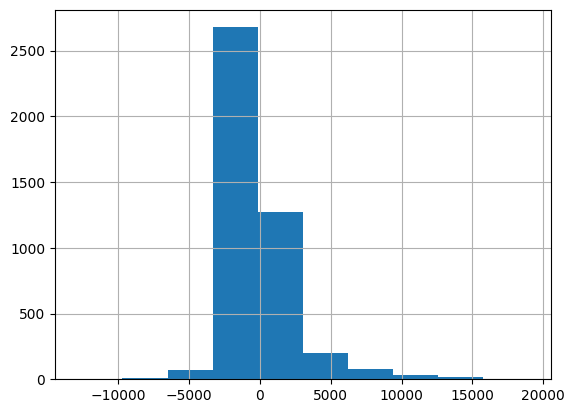

In [ ]:
residuals3.hist()

## Model 4

In [ ]:
X4 = df_scaled.drop(['price', 'number_of_reviews'], axis = 1)

y4 = df_scaled['price']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2, random_state = 42)

model4 = LinearRegression()

model4.fit(X_train4, y_train4)

y_pred4 = model4.predict(X_test4)

mse4 = mean_squared_error(y_test4, y_pred4)

r2_4 = r2_score(y_test4, y_pred4)

residuals4 = y_test4 - y_pred4

In [ ]:
print(mse4)
print(r2_4)
print(residuals4.mean())

0.015071822281884886
0.31790384165101504
-0.004216800593114751


<Axes: >

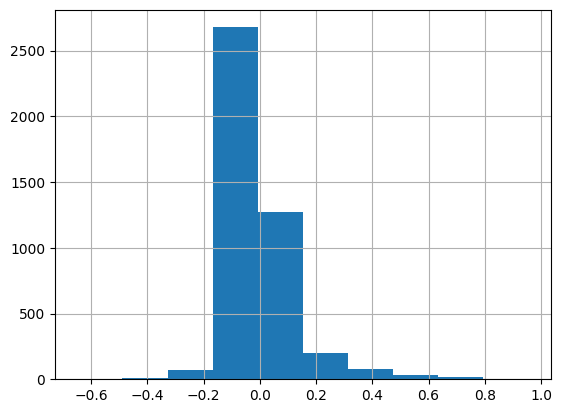

In [ ]:
residuals4.hist()

###P-values

In [ ]:
import statsmodels.api as sm
X4 = sm.add_constant(X4)
model4_pvalue = sm.OLS(y4, X4).fit()
p_values4 = model4_pvalue.pvalues

In [ ]:
print(p_values4)

const                              6.166999e-34
room_type                         5.966643e-109
minimum_nights                     2.264413e-18
calculated_host_listings_count    1.201825e-161
availability_365                   7.644040e-02
number_of_reviews_ltm              5.497700e-05
bedrooms                           0.000000e+00
bathrooms                         1.959790e-233
dtype: float64


### Coefficient Analysis

In [ ]:
model4.intercept_

0.029990402470733132

In [ ]:
model4.coef_

array([-0.13612229,  0.07441418,  0.14233701,  0.00567486, -0.03197489,
        1.83530198,  0.84632485])

f(x) = (-0.13612229 * room_type + 0.07441418 * minimum nights + 0.14233701 * calculated_host_listings_count + 0.00567486 * availability_365 + -0.03197489 * number_of_reviews_ltm + 1.83530198 * bedrooms + 0.84632485 * bathrooms) + 0.0299

Positive - 0.0744, 0.1423, 0.0056, 1.8353, 0.8463
minimum nights, calculated host listings count, availability 365, bedrooms, bathrooms
Negative - -0.1361, -0.0319
Room_type, Number of reviews(ltm)

## Model 5

In [ ]:
X5 = df_scaled.drop(['price', 'minimum_nights'], axis = 1)

y5 = df_scaled['price']

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size = 0.2, random_state = 42)

model5 = LinearRegression()

model5.fit(X_train5, y_train5)

y_pred5 = model5.predict(X_test5)

mse5 = mean_squared_error(y_test5, y_pred5)

r2_5 = r2_score(y_test5, y_pred5)

residuals5 = y_test5 - y_pred5

In [ ]:
print(mse5)
print(r2_5)
print(residuals5.mean())

0.015103855797823239
0.31645412059198796
-0.0042262108038519505


#### P-values

In [ ]:
import statsmodels.api as sm
X5 = sm.add_constant(X5)
model5_pvalue = sm.OLS(y5, X5).fit()
p_values5 = model5_pvalue.pvalues

In [ ]:
print(p_values5)

const                              7.694267e-50
room_type                         7.962527e-125
number_of_reviews                  8.329132e-01
calculated_host_listings_count    8.399065e-155
availability_365                   2.743381e-01
number_of_reviews_ltm              1.628405e-04
bedrooms                           0.000000e+00
bathrooms                         7.335928e-239
dtype: float64


#### Coefficient Analysis

In [ ]:
model5.intercept_

0.035896037344560094

In [ ]:
model5.coef_

array([-1.44913664e-01, -1.15940752e-03,  1.40269142e-01,  4.05997871e-03,
       -4.12984944e-02,  1.87566246e+00,  8.57332095e-01])

f(x) = (-1.44913664e-01 * room_type + -1.15940752e-03 * minimum nights + 1.40269142e-01 * calculated_host_listings_count + 4.05997871e-03 * availability_365 + -4.12984944e-02 * number_of_reviews_ltm + 1.87566246e+00 * bedrooms + 8.57332095e-01 * bathrooms) + 0.03589

Positive - 1.4026, 4.0599, 1.8756, 8.5733

calculated host listings count, availability 365, bedrooms, bathrooms

Negative - -1.4491, -1.1594, -4.1298

Room_type, minimum nights, Number of reviews(ltm)

## Model 6

<Axes: >

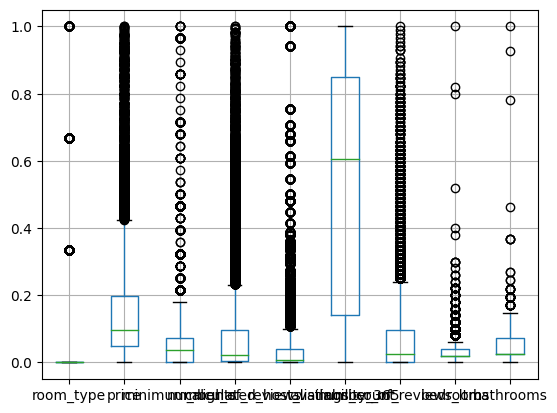

In [ ]:
df_scaled.boxplot()

(we couldn't find a way to change the labels for X)

In [ ]:
df_scaled = df_scaled[df_scaled['minimum_nights'] < 0.6]
df_scaled = df_scaled[df_scaled['bedrooms'] < 0.9]


We removed outliers from the scaled dataset to have a cleaner model.

In [ ]:
X6 = df_scaled.drop(['price', 'availability_365'], axis = 1)
y6 = df_scaled['price']

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size = 0.2, random_state = 42)

model6 = LinearRegression()

model6.fit(X_train6, y_train6)

y_pred6 = model6.predict(X_test6)

mse6 = mean_squared_error(y_test6, y_pred6)

r2_6 = r2_score(y_test6, y_pred6)

residuals6 = y_test6 - y_pred6

In [ ]:
print(mse6)
print(r2_6)
print(residuals6.mean())

0.015664659045299102
0.332765783764715
-0.0025138593950156797


###P-values

In [ ]:
import statsmodels.api as sm
X6 = sm.add_constant(X6)
model6_pvalue = sm.OLS(y6, X6).fit()
p_values6 = model6_pvalue.pvalues

In [ ]:
print(p_values6)

const                              1.164001e-35
room_type                          3.387929e-89
minimum_nights                     4.512813e-36
number_of_reviews                  9.551103e-01
calculated_host_listings_count    4.266970e-163
number_of_reviews_ltm              2.971607e-02
bedrooms                           0.000000e+00
bathrooms                         3.560689e-191
dtype: float64


###Coefficient Analysis

In [ ]:
model6.intercept_

0.02719011863026405

In [ ]:
model6.coef_

array([-0.12187534,  0.14632785, -0.00297869,  0.14128041, -0.01651505,
        1.95557748,  0.75071225])

- f(x) = (-0.12187534 * room_type + 0.14632785 * minimum nights + -0.00297869 * calculated_host_listings_count + 0.14128041 * number_of_reviews + -0.01651505 * number_of_reviews_ltm + 1.95557748 * bedrooms + 0.75071225 * bathrooms) + 0.02719

- Positive - 0.1463, 0.1412, 1.9555, 0.7507
minimum nights, calculated host listings count, number_of_reviews, bedrooms, bathrooms
- Negative - -0.1218, -0.0029, -0.0165
Room_type, Number of reviews(ltm), calculated host listings count

- Model 6 is the better model because the MSE is closer to 0, which means the model's predictions are very close to the actual values. The residual mean is 0, which suggests that the model is unbiased, meaning it does not systematically overpredict or underpredict the outcomes. Although the r2 lower than the model, but it is not close to 1 which suggests the model has limited ability to predict outcomes based on the independent variables.

#Final Recommedations

- Given the analysis of the linear regression model of the Airbnb listings for Cape Town, South Africa. It suggests that the model is only explaining 33.3% of the variance of the target variable, which means 66.7% there significant amount of variables that need to be considered within the dataset. For example including other variables such as income, occupation, personal or business travel, crime rates within the area these are only a sum few of the variables that could be considered to better the model. I suggest that other hosts study the reviews and perform further market research on if people prefer hotels than Airbnbs, their reviews and derive a customer satisifaction metrics.